## Load data

In [1]:
import os
import re
import functools
import numpy as np
import pandas as pd
import pickle5 as pickle

In [2]:
# CURR_PATH = os.getcwd()
CURR_PATH = '/home/svetlanamaslenkova/Documents/AKI_deep/LSTM'
DATA_PATH = '/home/svetlanamaslenkova/Documents/data/'
DF_PATH = CURR_PATH +'/dataframes/'

In [3]:
ED_PATH = DATA_PATH+'physionet.org/files/mimic-iv-ed/1.0/ed/'
PKL_PATH = CURR_PATH+'/pickles/'
PKL_PATH

'/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/pickles/'

In [4]:
import pandas as pd

data_icd_diagnoses = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/d_icd_diagnoses.csv')

data_icd_diagnoses.columns = data_icd_diagnoses.columns.str.lower()

data_icd_diagnoses.head()

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A


In [5]:
import pandas as pd

data_diagnoses = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/diagnoses_icd.csv')

data_diagnoses.columns = data_diagnoses.columns.str.lower()

data_diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,15734973,20475282,3,2825,9
1,15734973,20475282,2,V0251,9
2,15734973,20475282,5,V270,9
3,15734973,20475282,1,64891,9
4,15734973,20475282,4,66481,9


In [6]:
import pandas as pd

data_patients = pd.read_csv(DATA_PATH+'mimic-iv-1.0/core/patients.csv')

data_patients.columns = data_patients.columns.str.lower()

data_patients.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000048,F,23,2126,2008 - 2010,NaN
1,10002723,F,0,2128,2017 - 2019,NaN
2,10003939,M,0,2184,2008 - 2010,NaN
3,10004222,M,0,2161,2014 - 2016,NaN
4,10005325,F,0,2154,2011 - 2013,NaN


In [7]:
import pandas as pd

data_admissions = pd.read_csv(DATA_PATH+'mimic-iv-1.0/core/admissions.csv')

data_admissions.columns = data_admissions.columns.str.lower()

data_admissions.head(2)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
0,14679932,21038362,2139-09-26 14:16:00,2139-09-28 11:30:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,SINGLE,UNKNOWN,NaN,NaN,0
1,15585972,24941086,2123-10-07 23:56:00,2123-10-12 11:22:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,NaN,NaN,0


In [8]:
data_admissions['hadm_id'] = data_admissions['hadm_id'].astype(int)

In [9]:
import pandas as pd

data_edstays = pd.read_csv(ED_PATH+'edstays.csv')

data_edstays.columns = data_edstays.columns.str.lower()

data_edstays.head()

,subject_id,hadm_id,stay_id,intime,outtime
0,10000115,NaN,38081480,2154-12-10 02:04:00,2154-12-10 02:16:00
1,10000115,NaN,30295111,2154-12-17 16:37:00,2154-12-17 17:38:00
2,10000473,NaN,33267868,2138-03-15 20:07:00,2138-03-15 20:26:00
3,10000764,27897940.0,35420907,2132-10-14 19:31:00,2132-10-14 23:32:59
4,10001038,NaN,34301067,2149-08-07 08:51:00,2149-08-07 08:55:00


In [10]:
import pandas as pd

data_vitals = pd.read_csv(ED_PATH+'vitalsign.csv')

data_vitals.columns = data_vitals.columns.str.lower()

data_vitals.head()

,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,16113983,37539106,2116-06-10 00:32:00,98.2,82.0,15.0,NaN,106.0,72.0,NaN,NaN
1,15128994,30058281,2167-08-29 02:25:00,98.3,79.0,20.0,97.0,126.0,73.0,NaN,0
2,15128994,30058281,2167-08-29 04:51:00,97.6,79.0,20.0,98.0,126.0,73.0,NaN,0
3,15128994,30058281,2167-08-29 05:35:00,98.3,76.0,18.0,NaN,123.0,68.0,NaN,0/10
4,18019452,37300626,2148-12-19 12:34:00,98.1,100.0,16.0,98.0,129.0,86.0,NaN,0


In [11]:
# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
# data_vitals['charttime'] = pd.to_datetime(data_vitals['charttime'], format=format_)
data_admissions['admittime'] = pd.to_datetime(data_admissions['admittime'], format=format_)
data_admissions['dischtime'] = pd.to_datetime(data_admissions['dischtime'], format=format_)
# data_edstays['hadm_id'] = data_edstays['hadm_id'].dropna().astype('uint64')

In [12]:
import pandas as pd

data_farmacy = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/pharmacy.csv')

data_farmacy.columns = data_farmacy.columns.str.lower()

data_farmacy.head(5)

/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (16,18,24,26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,entertime,...,basal_rate,one_hr_max,doses_per_24_hrs,duration,duration_interval,expiration_value,expiration_unit,expirationdate,dispensation,fill_quantity
0,17868682,22726960,2697460,17868682-19,2160-01-07 14:00:00,2160-01-07 14:00:00,NaN,IV Large Volume,Discontinued,2160-01-07 13:06:18,...,NaN,NaN,NaN,NaN,Ongoing,NaN,Enter on Label,NaN,Distribution-Floor Stock,NaN
1,17868682,22726960,1383959,17868682-20,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent,Unit Dose,Discontinued via patient discharge,2160-01-07 14:25:45,...,NaN,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
2,17868682,22726960,64138666,17868682-23,2160-01-07 15:00:00,2160-01-08 16:00:00,Sodium Chloride 0.9% Flush,Unit Dose,Discontinued via patient discharge,2160-01-07 14:25:45,...,NaN,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Floor Stock Item,NaN
3,17868682,22726960,43535627,17868682-28,2160-01-07 15:00:00,2160-01-08 14:00:00,Ondansetron,Unit Dose,Expired,2160-01-07 14:25:45,...,NaN,NaN,1.0,1.0,Doses,36.0,Hours,NaN,Omnicell,NaN
4,17868682,22726960,13072826,17868682-29,2160-01-07 15:00:00,2160-01-07 16:00:00,Morphine Sulfate,Unit Dose,Discontinued,2160-01-07 14:25:45,...,0.0,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN


In [13]:
data_farmacy.shape

(14736386, 27)

In [64]:
import pandas as pd

data_prescriptions = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/prescriptions.csv')

data_prescriptions.columns = data_prescriptions.columns.str.lower()

# data_prescriptions['ndc'] = data_prescriptions['ndc'].astype('uint64')

data_prescriptions.head(5)

/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,17868682,22726960,73313910,2160-01-07 08:00:00,2160-01-07 21:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,300,mg,2,TAB,1.0,PO
1,17868682,22726960,16239987,2160-01-07 08:00:00,2160-01-08 16:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,150,mg,1,TAB,1.0,PO
2,17868682,22726960,16634804,2160-01-07 10:00:00,2160-01-07 16:00:00,MAIN,Aspirin,004380,904404073.0,81mg Tab,NaN,81,mg,1,TAB,1.0,PO
3,17868682,22726960,2697460,2160-01-07 14:00:00,2160-01-07 14:00:00,BASE,1/2 NS,001209,338004304.0,1000mL Bag,NaN,1000,mL,1000,mL,NaN,IV
4,17868682,22726960,1383959,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Pneumococcal Vac Polyvalent,048548,6494300.0,25mcg/0.5mL Vial,NaN,0.5,mL,1,VIAL,NaN,IM


In [15]:
data_prescriptions.shape

(17008053, 17)

In [65]:
# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
data_prescriptions['starttime'] = pd.to_datetime(data_prescriptions['starttime'], format=format_)
data_prescriptions['stoptime'] = pd.to_datetime(data_prescriptions['stoptime'], format=format_)

In [17]:
data_prescriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17008053 entries, 0 to 17008052
Data columns (total 17 columns):
 #   Column            Dtype         
---  ------            -----         
 0   subject_id        int64         
 1   hadm_id           int64         
 2   pharmacy_id       int64         
 3   starttime         datetime64[ns]
 4   stoptime          datetime64[ns]
 5   drug_type         object        
 6   drug              object        
 7   gsn               object        
 8   ndc               float64       
 9   prod_strength     object        
 10  form_rx           object        
 11  dose_val_rx       object        
 12  dose_unit_rx      object        
 13  form_val_disp     object        
 14  form_unit_disp    object        
 15  doses_per_24_hrs  float64       
 16  route             object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(10)
memory usage: 2.2+ GB


In [9]:
import pandas as pd

data_labitems = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/d_labitems.csv')

data_labitems.columns = data_labitems.columns.str.lower()
data_labitems.label = data_labitems.label.str.lower()
labitems = data_labitems.copy()
data_labitems.head(2)

,itemid,label,fluid,category,loinc_code
0,51905,,Other Body Fluid,Chemistry,NaN
1,51532,11-deoxycorticosterone,Blood,Chemistry,NaN


In [37]:
%%time
# print('Loading patients lab events table...')
# print('WARNING! THIS IS A HUGE CSV FILE, SO ONLY PART OF IT IS LOADED...')

# # data_labevents = pd.read_csv('/content/physionet.org/files/mimiciv/1.0/hosp/labevents.csv', nrows=100000000)
# data_labevents = pd.read_csv('/home/svetlanamaslenkova/Documents/data/mimic-iv-1.0/hosp/labevents.csv', 
#         header=0, usecols=['subject_id', 'hadm_id', 'specimen_id', 'itemid','flag', 'charttime', 'value', 'valueuom'],
#                             dtype={'subject_id':'uint32', 'flag':'category', 'valueuom':'category'},
#                        keep_default_na=False,low_memory=False)

# data_labevents.columns = data_labevents.columns.str.lower()


Loading patients lab events table...
WARNING! THIS IS A HUGE CSV FILE, SO ONLY PART OF IT IS LOADED...


In [27]:
import pickle5 as pickle

with open(PKL_PATH+'labevents.pkl', 'rb') as handle:
    labevents = pickle.load(handle)

In [21]:
labevents.shape

(45588398, 8)

Load labevents table:

In [11]:
# take item ids of all needed features

anion_gap_id = labitems[labitems.label.str.contains('anion').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
albumin_id = labitems[labitems.label.str.contains('albumin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bands_id = labitems[labitems.label.str.contains('bands').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bilirubin_id = labitems[labitems.label.str.contains('bilirubin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
hematocrit_id = labitems[labitems.label.str.contains('hematocrit').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
lactate_id = labitems[labitems.label.str.contains('lactate').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
sodium_id = labitems[labitems.label.str.contains('sodium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bicarbonate_id = labitems[labitems.label.str.contains('bicarbonate').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
bun_id = labitems[labitems.label.str.contains('nitrogen').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
calcium_id = labitems[labitems.label.str.contains('calcium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
chloride_id = labitems[labitems.label.str.contains('chloride').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
creatinine_id = labitems[labitems.label.str.contains('creatinine').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
hemoglobin_id = list(set(labitems[labitems.label.str.contains('hemoglobin').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()) - set(['51212']))
inr_id = labitems[labitems.label.str.contains('inr').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
platelet_id = labitems[labitems.label.str.contains('platelet').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
potassium_id = labitems[labitems.label.str.contains('potassium').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
pt_id = ['51274', '52921', '52163', '52164']
ppt_id = ['51275', '52923', '52165', '52166', '52166', '52167']
wbc_id = labitems[labitems.label.str.contains('wbc').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()
glucose_id = labitems[labitems.label.str.contains('glucose').fillna(False) & labitems.fluid.isin(['Blood', 'Urine'])].itemid.to_list()

In [12]:
# put all codes in one list

temp = [albumin_id, sodium_id, bun_id, creatinine_id, inr_id, pt_id, ppt_id, wbc_id, glucose_id, anion_gap_id, bands_id, bilirubin_id, \
   hematocrit_id,  lactate_id, bicarbonate_id, bun_id, calcium_id, chloride_id, hemoglobin_id, platelet_id, potassium_id]

lab_itemids = []

for l in temp:
    lab_itemids = lab_itemids + l
    
# all needed itemids    
len(lab_itemids)

137

In [198]:
# define a chunksize that would occupy a maximum of 1Gb 
# we divide by 10 because we have selected 10 lines in our df_sample
# we then get the integer part of the result
my_chunk = 1000000

# create the iterator
iter_csv = pd.read_csv(DATA_PATH+'mimic-iv-1.0/hosp/labevents.csv', 
        header=0, usecols=['subject_id', 'hadm_id', 'specimen_id', 'itemid','flag', 'charttime', 'value', 'valueuom'],
                            dtype={'subject_id':'uint32', 'flag':'str', 'valueuom':'category'},
                       keep_default_na=False,low_memory=False, iterator=True, chunksize=my_chunk)

# concatenate according to a filter to our result dataframe
df_result = pd.concat(
    [chunk[chunk.itemid.isin(lab_itemids)] 
    for chunk in iter_csv])

In [199]:
df_result.shape

(47211600, 8)

In [200]:
labevents = df_result.copy()

In [89]:
# Removing labevents with no hadm_id or no value

labevents = labevents[labevents.hadm_id != '']
labevents['hadm_id'] = pd.to_numeric(labevents['hadm_id'], errors='coerce')
labevents = labevents.dropna(subset=['hadm_id'])

# change charttime column to datettime type
format_ = '%Y-%m-%d %H:%M:%S'
labevents['charttime'] = pd.to_datetime(labevents['charttime'], format=format_)

# removing duplicated rows and rows with no value
labevents = labevents.drop_duplicates()
labevents = labevents[labevents.value != '']
labevents = labevents.dropna(subset=['value'])
labevents.shape

In [221]:
# # what if we do not delete the results without hadm_id
# labevents['hadm_id'] = pd.to_numeric(labevents['hadm_id'], errors='coerce')
# labevents['hadm_id'] = labevents['hadm_id'].astype(dtype=np.int32, errors='ignore')
# # change charttime column to datettime type
# format_ = '%Y-%m-%d %H:%M:%S'
# labevents['charttime'] = pd.to_datetime(labevents['charttime'], format=format_)

In [92]:
labevents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28044130 entries, 150 to 122092787
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   subject_id   uint32        
 1   hadm_id      float64       
 2   specimen_id  int64         
 3   itemid       int64         
 4   charttime    datetime64[ns]
 5   value        object        
 6   valueuom     object        
 7   flag         object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3), uint32(1)
memory usage: 1.8+ GB


In [93]:
# with open(PKL_PATH + 'labevents.pkl', 'wb') as f:
#     pickle.dump(labevents, f, protocol=pickle.HIGHEST_PROTOCOL)

In [130]:
with open(PKL_PATH + 'labevents.pkl', 'rb') as f:
    labevents = pickle.load(f)

## Demographics

In [554]:
# merging admissions amd patients tables to get demographics

data_demographics = pd.merge(data_admissions[['subject_id',	'hadm_id',	'admittime',	'dischtime', 'ethnicity']], \
    data_patients[['subject_id',	'gender',	'anchor_age',	'anchor_year']], \
     how='outer', on=['subject_id'])

In [555]:
# get age of patients at the time of an admission

data_demographics['age_of_birth'] = data_demographics['anchor_year'] - data_demographics['anchor_age']
data_demographics['age'] = [value.year for value in data_demographics['admittime']] - data_demographics['age_of_birth']

In [556]:
# drop unnecessary columns

data_demographics = data_demographics.drop(['anchor_age','anchor_year', 'age_of_birth'], axis=1)
data_demographics.head()

,subject_id,hadm_id,admittime,dischtime,ethnicity,gender,age
0,14679932,21038362.0,2139-09-26 14:16:00,2139-09-28 11:30:00,UNKNOWN,F,0.0
1,15585972,24941086.0,2123-10-07 23:56:00,2123-10-12 11:22:00,WHITE,F,0.0
2,11989120,21965160.0,2147-01-14 09:00:00,2147-01-17 14:25:00,UNKNOWN,M,0.0
3,17817079,24709883.0,2165-12-27 17:33:00,2165-12-31 21:18:00,OTHER,F,0.0
4,15078341,23272159.0,2122-08-28 08:48:00,2122-08-30 12:32:00,BLACK/AFRICAN AMERICAN,M,0.0


In [ ]:
# pid_labevents['lab_test'] = pid_labevents['category'].astype(str) + ' ' + pid_labevents['fluid'].astype(str) + ' ' +  pid_labevents['label'].astype(str) + ' {' + pid_labevents['value'].astype(str) + '} ' + pid_labevents['valueuom'].astype(str) 
# pid_labevents['lab_test'] = [val.replace(" nan", " within range") for val in pid_labevents['lab_test']]
# pid_labevents = pid_labevents[['subject_id', 'hadm_id', 'admittime', 'charttime', 'lab_test', 'specimen_id']]
# pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [625]:
data_demographics = data_demographics[data_demographics.age>=18]

In [626]:
# build demographics sentence

data_demographics['demographics'] = data_demographics['ethnicity'].astype(str) + ' ' + data_demographics['gender'].astype(str) + ' ' +  data_demographics['age'].astype(str)

In [623]:
data_demographics.head()

,subject_id,hadm_id,admittime,dischtime,ethnicity,gender,age,demographics
43,10292548,26653546.0,2120-01-07 05:51:00,2120-01-12 13:45:00,ASIAN,F,35.0,ASIAN F 35.0
44,10292548,24067979.0,2119-07-26 04:35:00,2119-07-27 19:35:00,ASIAN,F,34.0,ASIAN F 34.0
56,19120008,24459786.0,2185-09-18 11:15:00,2185-09-20 15:30:00,ASIAN,M,70.0,ASIAN M 70.0
57,19120008,28496347.0,2187-07-27 01:04:00,2187-08-02 18:16:00,ASIAN,M,72.0,ASIAN M 72.0
58,19120008,27495024.0,2190-06-30 01:16:00,2190-07-18 18:07:00,ASIAN,M,75.0,ASIAN M 75.0


In [627]:
data_demographics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462112 entries, 43 to 523739
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   subject_id    462112 non-null  int64         
 1   hadm_id       462112 non-null  float64       
 2   admittime     462112 non-null  datetime64[ns]
 3   dischtime     462112 non-null  datetime64[ns]
 4   ethnicity     462112 non-null  object        
 5   gender        462112 non-null  object        
 6   age           462112 non-null  float64       
 7   demographics  462112 non-null  object        
dtypes: datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 31.7+ MB


In [561]:
with open(PKL_PATH + 'data_demographics.pkl', 'wb') as f:
    pickle.dump(data_demographics, f, protocol=pickle.HIGHEST_PROTOCOL)

## Lab tests

### Laboratory test results

In [131]:
# Removing labevents with no hadm_id

data_labevents = labevents[~labevents.hadm_id.isnull()].copy()
data_labevents.shape

(27957340, 8)

In [29]:
# merge data_labevents and labitems to get more readable table

data_labevents = data_labevents.merge(data_labitems[['itemid', 'label',	'fluid', 'category']], on='itemid')

In [96]:
# number of unique admissions in data_labevents

data_labevents.hadm_id.unique().shape

(425597,)

In [171]:
data_labevents.head()

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label,fluid,category
0,10000764,27897940.0,33770094,51221,2132-10-15 00:50:00,40.2,%,,hematocrit,Blood,Hematology
1,10000764,27897940.0,81855644,51221,2132-10-15 05:00:00,38.7,%,abnormal,hematocrit,Blood,Hematology
2,10000764,27897940.0,26598444,51221,2132-10-15 07:45:00,43.1,%,,hematocrit,Blood,Hematology
3,10000764,27897940.0,4318463,51221,2132-10-16 06:03:00,37.0,%,abnormal,hematocrit,Blood,Hematology
4,10000764,27897940.0,9550105,51221,2132-10-17 05:59:00,35.5,%,abnormal,hematocrit,Blood,Hematology


In [98]:
data_labitems.head()

,itemid,label,fluid,category,loinc_code
0,51905,,Other Body Fluid,Chemistry,NaN
1,51532,11-deoxycorticosterone,Blood,Chemistry,NaN
2,51957,17-hydroxycorticosteroids,Urine,Chemistry,NaN
3,51958,"17-ketosteroids, urine",Urine,Chemistry,NaN
4,52068,24 hr,Blood,Hematology,NaN


In [99]:
# remove duplicates rows  from data_labitems and replace NaN values with ''
data_labitems_names =  data_labitems[['itemid', 'category', 'fluid', 'label']].drop_duplicates()
data_labitems_names['label'] = [str(val).replace("NaN", "") for val in data_labitems_names['label']]

# remove duplicates rows  from data_labevents and merge with labitems names
pid_labevents = data_labevents[['subject_id', 'hadm_id', 'charttime', 'itemid', 'value', 'valueuom', 'specimen_id']].drop_duplicates()
pid_labevents = pd.merge(pid_labevents, data_labitems_names, on=['itemid'])
pid_labevents = pd.merge(pid_labevents, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

# make sentences for labevents
pid_labevents['lab_test'] = pid_labevents['category'].astype(str) + ' ' + pid_labevents['fluid'].astype(str) + ' ' +  pid_labevents['label'].astype(str) + ' {' + pid_labevents['value'].astype(str) + '} ' + pid_labevents['valueuom'].astype(str) 
pid_labevents['lab_test'] = [val.replace(" nan", " within range") for val in pid_labevents['lab_test']]
pid_labevents = pid_labevents[['subject_id', 'hadm_id', 'admittime', 'charttime', 'lab_test', 'specimen_id']]
pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [100]:
# make day_id column with day 0 is first 24 hours of admission

pid_labevents['day_id'] = pid_labevents['charttime'] - pid_labevents['admittime']
pid_labevents['day_id'] = [d.days for d in pid_labevents.iloc[:, -1]]

In [101]:
# min and max day_id values

print(np.min(pid_labevents.day_id))
print(np.max(pid_labevents.day_id))

-4
1190


In [102]:
# concatenating labtests from the same day into one big sentence

res = pid_labevents.sort_values(['hadm_id', 'day_id'])\
    .groupby(['subject_id', 'hadm_id', 'day_id'], sort=False).lab_test\
        .apply('; '.join)\
            .reset_index(name='lab_tests')

res

,subject_id,hadm_id,day_id,lab_tests
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...
3,16925328,20000024,0,Hematology Blood hematocrit {32.1} %; Hematolo...
4,19430048,20000034,0,Hematology Blood hematocrit {30.3} %; Hematolo...
...,...,...,...,...
1828569,16572164,29999828,0,Hematology Blood hematocrit {45.0} %
1828570,16572164,29999828,1,Hematology Blood hematocrit {43.1} %; Hematolo...
1828571,16549335,29999928,0,Hematology Blood hematocrit {38.6} %; Hematolo...
1828572,16549335,29999928,1,Hematology Blood hematocrit {32.0} %; Hematolo...


In [103]:
pid_labevents = res.copy()

In [104]:
print(pid_labevents.shape)
print(res.shape)

(1828574, 4)
(1828574, 4)


In [105]:
# with open(PKL_PATH + 'pid_labevents.pkl', 'wb') as f:
#     pickle.dump(pid_labevents, f, protocol=pickle.HIGHEST_PROTOCOL)

In [132]:
with open(PKL_PATH + 'pid_labevents.pkl', 'rb') as f:
    pid_labevents = pickle.load(f)

### Creatinine

In [173]:
#  replacing NaN with 0 for hadm_id

# labevents['hadm_id'] = labevents['hadm_id'].fillna(0).astype(dtype=np.int32, errors='ignore')
# labevents

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag
150,10000764,27897940,33770094,51221,2132-10-15 00:50:00,40.2,%,
151,10000764,27897940,81855644,51221,2132-10-15 05:00:00,38.7,%,abnormal
154,10000764,27897940,26598444,51221,2132-10-15 07:45:00,43.1,%,
155,10000764,27897940,26598444,51222,2132-10-15 07:45:00,14.3,g/dL,
162,10000764,27897940,26598444,51265,2132-10-15 07:45:00,169,K/uL,
...,...,...,...,...,...,...,...,...
122067786,14954698,22076752,65000859,51518,2192-02-29 14:00:00,FEW,,
122067788,17277045,27943288,26155969,51518,2135-07-03 11:31:00,MANY,,
122067789,15268535,24926576,55507102,51518,2151-03-17 13:03:00,MOD,,
122074191,19265828,22506499,88071074,51237,2161-07-05 05:40:00,ERROR,,abnormal


In [17]:
# the createnine codes we are interested in 

itemid_creatinine = [50912, 52024, 51081]

data_labitems[data_labitems.itemid.isin(itemid_creatinine)]

,itemid,label,fluid,category,loinc_code
514,50912,creatinine,Blood,Chemistry,2160-0
523,51081,"creatinine, serum",Urine,Chemistry,NaN
526,52024,"creatinine, whole blood",Blood,Blood Gas,NaN


In [18]:
# filtering data_labevents table to get only creatinine lab tests

labevents_creatinine = data_labevents[data_labevents.itemid.isin(itemid_creatinine)].copy()
# labevents_creatinine = labevents[labevents.itemid.isin(itemid_creatinine)].copy()

In [177]:
labevents_creatinine.shape

(1996562, 11)

In [178]:
labevents_creatinine

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label,fluid,category
11863832,10000764,27897940.0,42075698,50912,2132-10-15 07:45:00,1.5,mg/dL,abnormal,creatinine,Blood,Chemistry
11863833,10000764,27897940.0,43331822,50912,2132-10-16 06:03:00,1.4,mg/dL,abnormal,creatinine,Blood,Chemistry
11863834,10000764,27897940.0,24885655,50912,2132-10-17 05:59:00,1.5,mg/dL,abnormal,creatinine,Blood,Chemistry
11863835,10000764,27897940.0,79417058,50912,2132-10-18 06:10:00,1.6,mg/dL,abnormal,creatinine,Blood,Chemistry
11863836,10000764,27897940.0,23075119,50912,2132-10-19 07:28:00,1.6,mg/dL,abnormal,creatinine,Blood,Chemistry
...,...,...,...,...,...,...,...,...,...,...,...
27972330,18527418,28559683.0,79002836,51081,2115-03-13 16:22:00,1.4,mg/dL,,"creatinine, serum",Urine,Chemistry
27972331,18527418,23546357.0,89449470,51081,2116-09-05 15:48:00,1.7,mg/dL,,"creatinine, serum",Urine,Chemistry
27972332,18527418,29127037.0,5072122,51081,2117-10-03 10:53:00,1.6,mg/dL,,"creatinine, serum",Urine,Chemistry
27972333,19538400,22032603.0,5942754,51081,2137-03-11 14:37:00,2.2,mg/dL,,"creatinine, serum",Urine,Chemistry


In [179]:
data_labevents.shape # 28619957

(28044130, 11)

In [19]:
# converting value into float

labevents_creatinine['value'] = labevents_creatinine['value'].astype(float)

In [21]:
labevents_creatinine.hadm_id.unique().shape

(342401,)

In [22]:
# keep only first test
hid_normal_1_test = labevents_creatinine[~labevents_creatinine.hadm_id.isna()]\
    .copy().sort_values(['hadm_id', 'charttime']).drop_duplicates(subset=['hadm_id'], keep='first')

# first test & normal
hid_normal_1test = hid_normal_1_test[hid_normal_1_test.flag == ''].hadm_id.to_list()
pid_normal_1test = hid_normal_1_test[hid_normal_1_test.flag == ''].subject_id.to_list()
#hid_normal_1test = [int(adm) for adm in hid_normal_1test]

print(f'admissions with the first SCr normal {len(hid_normal_1test)} ')
print(f'patients with the first SCr normal {len(hid_normal_1test)} ')

admissions with the first SCr normal 251589 
patients with the first SCr normal 251589 


In [23]:
# kepp anly admissions with the first SCr - nornal

labevents_creatinine = labevents_creatinine[['subject_id', 'hadm_id', 'charttime', 'value', 'valueuom']]
labevents_creatinine = labevents_creatinine.merge(data_admissions[['subject_id', 'hadm_id', 'admittime']],  how='left', on=['subject_id', 'hadm_id'])
labevents_creatinine = labevents_creatinine[labevents_creatinine.hadm_id.isin(hid_normal_1test)]

In [24]:
# filter out admissions with less than 2 SCr measurements
S = labevents_creatinine.groupby('hadm_id').count().sort_values('subject_id')
filtered_admissions = S[S.subject_id>1].index.to_list()

# filter out admissions with  less than 2 creatinine measurements
labevents_creatinine = labevents_creatinine[labevents_creatinine.hadm_id.isin(filtered_admissions)]

In [25]:
# inserting the day_id column

labevents_creatinine['day_id'] = labevents_creatinine['charttime'] - labevents_creatinine['admittime']
labevents_creatinine['day_id'] = [d.days for d in labevents_creatinine.iloc[:, -1]]

In [26]:
labevents_creatinine.hadm_id.unique().shape

(180989,)

In [27]:
# min and max day_id in labevents_creatinine dataframe

print(np.min(labevents_creatinine.day_id))
print(np.max(labevents_creatinine.day_id))

-4.0
1190.0


In [28]:
# remove duplicates and convert hadm_id into int type

labevents_creatinine = labevents_creatinine.drop_duplicates()
labevents_creatinine['hadm_id'] = labevents_creatinine['hadm_id'].astype(dtype=np.int32)

In [29]:
labevents_creatinine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1187355 entries, 9 to 1996551
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   subject_id  1187355 non-null  uint32        
 1   hadm_id     1187355 non-null  int32         
 2   charttime   1187355 non-null  datetime64[ns]
 3   value       1187355 non-null  float64       
 4   valueuom    1187355 non-null  object        
 5   admittime   1187177 non-null  datetime64[ns]
 6   day_id      1187177 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int32(1), object(1), uint32(1)
memory usage: 63.4+ MB


In [191]:
labevents_creatinine.head()

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
9,10003299,21476780,2183-02-26 22:18:00,1.1,mg/dL,2183-02-27 15:18:00,-1.0
10,10003299,21476780,2183-02-28 06:42:00,0.9,mg/dL,2183-02-27 15:18:00,0.0
11,10003299,20940957,2183-06-27 05:57:00,0.6,mg/dL,2183-06-26 20:27:00,0.0
12,10003299,20940957,2183-06-28 04:42:00,0.7,mg/dL,2183-06-26 20:27:00,1.0
13,10003299,20940957,2183-06-29 05:34:00,0.7,mg/dL,2183-06-26 20:27:00,2.0


In [30]:
with open(PKL_PATH + 'labevents_creatinine.pkl', 'wb') as f:
    pickle.dump(labevents_creatinine, f, protocol=pickle.HIGHEST_PROTOCOL)

In [9]:
with open(PKL_PATH + 'labevents_creatinine.pkl', 'rb') as f:
    labevents_creatinine = pickle.load(f)

In [35]:
data_admissions[data_admissions.hadm_id==26693007].admittime

252469   2171-05-18 00:30:00
Name: admittime, dtype: datetime64[ns]

In [8]:
labevents_creatinine[labevents_creatinine.hadm_id==23910112]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
247598,19936204,23910112,2144-01-08 05:46:00,1.0,mg/dL,2144-01-07 21:06:00,0.0
247599,19936204,23910112,2144-01-09 06:01:00,1.0,mg/dL,2144-01-07 21:06:00,1.0
247600,19936204,23910112,2144-01-10 05:34:00,1.0,mg/dL,2144-01-07 21:06:00,2.0
247601,19936204,23910112,2144-01-11 05:22:00,0.9,mg/dL,2144-01-07 21:06:00,3.0
247602,19936204,23910112,2144-01-12 05:01:00,1.0,mg/dL,2144-01-07 21:06:00,4.0
247603,19936204,23910112,2144-01-13 05:20:00,0.9,mg/dL,2144-01-07 21:06:00,5.0


### Calculating AKI time

In [759]:
# function for calculating AKI status for each day of an admission

def get_aki_status(admission):
    adm_labs = labevents_creatinine[(labevents_creatinine.hadm_id==admission)].sort_values('day_id')
    # admittime = data_admissions[data_admissions.hadm_id==admission].admittime
    days = adm_labs.day_id.values.tolist()
    hadm_ids = []
    aki_status = []
    aki_happened = False
    all_days = np.arange(np.min(days), np.max(days)+1)
    
    for day in all_days:
        # print(day)
        hadm_ids.append(admission)
        # first 24 hours of an admission no AKI
        if day == days[0]:
            aki_status.append(0)
            continue
        # put Nan if we do not have SCr measurements for a given day
        elif day not in days:
            aki_status.append(np.nan)
            continue

        # get current day's value
        scr_day = float(adm_labs[adm_labs.day_id==day].sort_values('value', ascending=False).value.values[0])
        # print(f'day {day} creatinine {scr_day}')

        if not aki_happened: 
            # get baselines values
            if len(adm_labs[adm_labs.day_id.isin(np.arange((day - 6), day))]) > 0:
                scr_baseline_1 = adm_labs[adm_labs.day_id.isin(np.arange((day - 6), day+1))].sort_values('value', ascending=True).value.values[0]
            elif len(adm_labs[adm_labs.day_id.isin(np.arange((day - 364), day))]) > 0:
                scr_baseline_1 = np.median(adm_labs[adm_labs.day_id.isin(np.arange((day - 364), day+1))].value.values)
            else:
                scr_baseline_1 = None

            if len(adm_labs[adm_labs.day_id==(day - 1)]) > 0:
                scr_baseline_2 = adm_labs[adm_labs.day_id.isin(np.arange((day - 1), day+1))].sort_values('value', ascending=True).value.values[0]
            else:
                scr_baseline_2 = None
            # print(f' baseline1 = {scr_baseline_1}, baseline2 = {scr_baseline_2}')

        # calculate aki
        if (scr_baseline_1 is not None)&(scr_baseline_2 is not None):
            if (scr_day >= 1.5*float(scr_baseline_1) ) or (scr_day >= 0.29 + float(scr_baseline_2) ):
                aki_status.append(1)
                aki_happened = True
            else:
                aki_status.append(0)

        elif scr_baseline_1 is not None:
            if scr_day >= 1.5*float(scr_baseline_1):
                aki_status.append(1)
                aki_happened = True
            else:
                # aki_status.append(np.nan)
                aki_status.append(0)

        elif scr_baseline_2 is not None:
            if scr_day >= 0.3 + float(scr_baseline_2):
                aki_status.append(1)
                aki_happened = True
            else:
                # aki_status.append(np.nan)
                aki_status.append(0)
        else:
            aki_status.append(np.nan)

    return {'hadm_id':hadm_ids, 'day_id':all_days, 'aki_status':aki_status}

In [140]:
admission = 20000041
adm_labs = labevents_creatinine[labevents_creatinine.hadm_id==admission].sort_values('day_id')
adm_labs

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
956915,18910522,20000041,2143-09-03 22:23:00,1.1,mg/dL,2143-09-03 07:15:00,0.0
956916,18910522,20000041,2143-09-05 07:16:00,1.1,mg/dL,2143-09-03 07:15:00,2.0
956917,18910522,20000041,2143-09-06 06:10:00,1.1,mg/dL,2143-09-03 07:15:00,2.0


In [195]:
get_aki_status(admission)

{'hadm_id': [20000041, 20000041, 20000041],
 'day_id': array([0., 1., 2.]),
 'aki_status': [0, nan, 0]}

In [196]:
patients = labevents_creatinine[~labevents_creatinine.day_id.isna()].drop_duplicates(subset=['hadm_id'], keep='first').subject_id.to_list()
admissions = labevents_creatinine[~labevents_creatinine.day_id.isna()].drop_duplicates(subset=['hadm_id'], keep='first').hadm_id.to_list()

In [197]:
len(admissions)

180974

In [198]:
len(patients)

180974

In [199]:
len(data_patients.subject_id.unique())

382278

Running the function using Multiprocessing: 

In [200]:
%%time
import traceback
import multiprocessing

final_aki_status = pd.DataFrame()
final_aki_status = pd.DataFrame()
chunk_size = 50000
n_chunks = len(admissions)//chunk_size
errors = []

for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=88) as pool_obj:
        pid_aki_status = pool_obj.map(get_aki_status, admissions[i*chunk_size:(i+1)*chunk_size])

    for e in pid_aki_status[:]:
        temp = pd.DataFrame(e)
        final_aki_status = pd.concat([final_aki_status, temp], ignore_index=True)

    print("Finished {} admissions".format((i+1)*chunk_size))

    # with open(PKL_PATH + 'pid_aki_status.pkl', 'wb') as f:
    #     pickle.dump(final_aki_status, f, protocol=pickle.HIGHEST_PROTOCOL)

Finished 50000 admissions
Finished 100000 admissions
Finished 150000 admissions
Finished 200000 admissions
CPU times: user 11min 17s, sys: 1min 14s, total: 12min 31s
Wall time: 15min 39s


In [201]:
len(final_aki_status.hadm_id.unique())

180974

In [126]:
# with open(PKL_PATH + 'pid_aki_status.pkl', 'wb') as f:
#     pickle.dump(final_aki_status, f, protocol=pickle.HIGHEST_PROTOCOL)

Here we are manually checking some of the labels:

In [202]:
final_aki_status.head(35)

,hadm_id,day_id,aki_status
0,21476780,-1.0,0.0
1,21476780,0.0,0.0
2,20940957,0.0,0.0
3,20940957,1.0,0.0
4,20940957,2.0,0.0
5,20940957,3.0,0.0
6,20940957,4.0,0.0
7,27373340,0.0,0.0
8,27373340,1.0,0.0
9,27373340,2.0,0.0


In [166]:
adm = 29279905
data_diagnoses[data_diagnoses.hadm_id==adm].merge(data_icd_diagnoses)

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,10019003,29279905,12,R0902,10,Hypoxemia
1,10019003,29279905,21,L271,10,Localized skin eruption due to drugs and medic...
2,10019003,29279905,5,D471,10,Chronic myeloproliferative disease
3,10019003,29279905,2,R6521,10,Severe sepsis with septic shock
4,10019003,29279905,17,G4733,10,Obstructive sleep apnea (adult) (pediatric)
5,10019003,29279905,18,J45909,10,"Unspecified asthma, uncomplicated"
6,10019003,29279905,3,N179,10,"Acute kidney failure, unspecified"
7,10019003,29279905,16,I10,10,Essential (primary) hypertension
8,10019003,29279905,1,A419,10,"Sepsis, unspecified organism"
9,10019003,29279905,25,Z66,10,Do not resuscitate


In [170]:
data_labevents[data_labevents.hadm_id==adm].sort_values('charttime')

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label,fluid,category
283,10019003,29279905.0,70400502,51221,2153-03-28 03:16:00,30.9,%,abnormal,hematocrit,Blood,Hematology
7835422,10019003,29279905.0,68688445,50882,2153-03-28 03:16:00,15,mEq/L,abnormal,bicarbonate,Blood,Chemistry
9822025,10019003,29279905.0,68688445,50902,2153-03-28 03:16:00,107,mEq/L,,chloride,Blood,Chemistry
11864104,10019003,29279905.0,68688445,50912,2153-03-28 03:16:00,2.5,mg/dL,abnormal,creatinine,Blood,Chemistry
2035721,10019003,29279905.0,70400502,51222,2153-03-28 03:16:00,10.1,g/dL,abnormal,hemoglobin,Blood,Hematology
...,...,...,...,...,...,...,...,...,...,...,...
3933045,10019003,29279905.0,57896560,51265,2153-04-07 05:47:00,84,K/uL,abnormal,platelet count,Blood,Hematology
15936624,10019003,29279905.0,13783863,50983,2153-04-07 05:47:00,144,mEq/L,,sodium,Blood,Chemistry
11864115,10019003,29279905.0,13783863,50912,2153-04-07 05:47:00,0.8,mg/dL,,creatinine,Blood,Chemistry
13859011,10019003,29279905.0,13783863,50971,2153-04-07 05:47:00,3.0,mEq/L,abnormal,potassium,Blood,Chemistry


In [159]:
data_admissions[data_admissions.hadm_id==adm]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
20438,10005348,29496232,2128-09-05 08:30:00,2128-09-12 16:55:00,NaN,ELECTIVE,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0


In [160]:
final_aki_status[final_aki_status.hadm_id==adm]

,hadm_id,day_id,aki_status
36,29496232,0.0,0.0
37,29496232,1.0,0.0
38,29496232,2.0,NaN
39,29496232,3.0,NaN
40,29496232,4.0,0.0
41,29496232,5.0,1.0
42,29496232,6.0,0.0


In [161]:
labevents_creatinine[labevents_creatinine.hadm_id==adm]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
91,10005348,29496232,2128-09-06 06:30:00,0.8,mg/dL,2128-09-05 08:30:00,0.0
92,10005348,29496232,2128-09-07 05:50:00,0.8,mg/dL,2128-09-05 08:30:00,1.0
93,10005348,29496232,2128-09-09 10:50:00,0.8,mg/dL,2128-09-05 08:30:00,4.0
94,10005348,29496232,2128-09-09 18:45:00,0.7,mg/dL,2128-09-05 08:30:00,4.0
95,10005348,29496232,2128-09-10 07:35:00,0.8,mg/dL,2128-09-05 08:30:00,4.0
96,10005348,29496232,2128-09-10 19:30:00,1.0,mg/dL,2128-09-05 08:30:00,5.0
97,10005348,29496232,2128-09-11 07:25:00,0.9,mg/dL,2128-09-05 08:30:00,5.0
98,10005348,29496232,2128-09-12 07:00:00,0.8,mg/dL,2128-09-05 08:30:00,6.0


In [164]:
labevents_creatinine.iloc[120:150,:]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
197,10012663,27340067,2171-06-02 04:30:00,0.7,mg/dL,2171-05-18 10:54:00,14.0
198,10012663,27340067,2171-06-06 19:50:00,0.6,mg/dL,2171-05-18 10:54:00,19.0
236,10014536,24693529,2113-12-22 05:00:00,0.6,mg/dL,2113-12-19 17:55:00,2.0
237,10014536,24693529,2113-12-23 01:35:00,0.7,mg/dL,2113-12-19 17:55:00,3.0
238,10014536,24693529,2113-12-25 05:45:00,0.7,mg/dL,2113-12-19 17:55:00,5.0
239,10014536,24693529,2113-12-25 09:10:00,0.8,mg/dL,2113-12-19 17:55:00,5.0
240,10016673,29103261,2188-03-19 06:05:00,0.8,mg/dL,2188-03-18 18:00:00,0.0
241,10016673,29103261,2188-03-20 06:30:00,0.7,mg/dL,2188-03-18 18:00:00,1.0
251,10017886,20015927,2140-12-16 05:00:00,0.7,mg/dL,2140-12-15 18:55:00,0.0
252,10017886,20015927,2140-12-17 06:40:00,0.9,mg/dL,2140-12-15 18:55:00,1.0


In [165]:
get_aki_status(29279905)

{'hadm_id': [29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905,
  29279905],
 'day_id': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 'aki_status': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}

## Vitals

In [71]:
# replacing Nan values with ''

pid_vitals = pd.merge(data_edstays, data_vitals).drop_duplicates()
pid_vitals['temperature'] = pid_vitals['temperature'].fillna('')
pid_vitals['heartrate'] = pid_vitals['heartrate'].fillna('')
pid_vitals['resprate'] = pid_vitals['resprate'].fillna('')
pid_vitals['o2sat'] = pid_vitals['o2sat'].fillna('')
pid_vitals['sbp'] = pid_vitals['sbp'].fillna('')
pid_vitals['dbp'] = pid_vitals['dbp'].fillna('')
pid_vitals['rhythm'] = pid_vitals['rhythm'].fillna('')
pid_vitals['pain'] = pid_vitals['pain'].fillna('')

In [72]:
# making sentence for each vital signs measurement

pid_vitals['vitals'] = 'temp {' + pid_vitals['temperature'].astype(str) + '} ' + 'heartrate {' + pid_vitals['heartrate'].astype(str) +'} ' \
    + 'resprate {' + pid_vitals['resprate'].astype(str) + '} ' + 'o2sat {' + pid_vitals['o2sat'].astype(str) + '} ' \
         + 'sbp {' + pid_vitals['sbp'].astype(str) + '} ' + 'dbp {' + pid_vitals['dbp'].astype(str) + '} ' \
             + 'rhythm {' + pid_vitals['rhythm'].astype(str) + '} ' + 'pain {' + pid_vitals['pain'].astype(str) + '} ' 


In [73]:
# an example of a single measurement

pid_vitals.iloc[1, -1]

'temp {98.0} heartrate {78.0} resprate {16.0} o2sat {99.0} sbp {116.0} dbp {70.0} rhythm {} pain {0} '

In [74]:
# remove rows with no hadm_id and merge with admissions table

pid_vitals = pid_vitals[~pid_vitals.hadm_id.isna()]
pid_vitals['hadm_id'] = pid_vitals['hadm_id'].astype(int)
pid_vitals = pd.merge(pid_vitals, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

# making the day_id column
pid_vitals['day_id'] = pid_vitals['charttime'] - pid_vitals['admittime']
pid_vitals['day_id'] = [d.days for d in pid_vitals.iloc[:, -1]]

In [75]:
# min and max day_id values
print(min(pid_vitals.day_id))
print(max(pid_vitals.day_id))

-24
17


In [76]:
# drop unnecessary columns

pid_vitals = pid_vitals[['subject_id', 'hadm_id', 'stay_id', 'charttime', 'vitals', 'day_id']]

In [77]:
pid_vitals.shape

(1107449, 6)

In [79]:
# converting subject_id and hadm_id into the right type (int)

pid_vitals['subject_id'] = pid_vitals['subject_id'].astype(int)
pid_vitals['hadm_id'] = pid_vitals['hadm_id'].astype(int)
pid_labevents['subject_id'] = pid_labevents['subject_id'].astype(int)
pid_labevents['hadm_id'] = pid_labevents['hadm_id'].astype(int)

In [80]:
pid_vitals.head()

,subject_id,hadm_id,stay_id,charttime,vitals,day_id
0,10000764,27897940,35420907,2132-10-14 19:56:00,temp {97.6} heartrate {92.0} resprate {24.0} o...,-1
1,10000764,27897940,35420907,2132-10-14 21:56:00,temp {} heartrate {101.0} resprate {19.0} o2sa...,-1
2,10000764,27897940,35420907,2132-10-14 23:59:00,temp {98.3} heartrate {104.0} resprate {14.0} ...,0
3,10000764,27897940,35420907,2132-10-15 03:57:00,temp {} heartrate {112.0} resprate {15.0} o2sa...,0
4,10000764,27897940,35420907,2132-10-15 06:28:00,temp {98.0} heartrate {119.0} resprate {23.0} ...,0


In [81]:
pid_vitals.columns = ['subject_id', 'hadm_id', 'stay_id', 'charttime', 'vital', 'day_id']

In [82]:
pid_vitals.head()

,subject_id,hadm_id,stay_id,charttime,vital,day_id
0,10000764,27897940,35420907,2132-10-14 19:56:00,temp {97.6} heartrate {92.0} resprate {24.0} o...,-1
1,10000764,27897940,35420907,2132-10-14 21:56:00,temp {} heartrate {101.0} resprate {19.0} o2sa...,-1
2,10000764,27897940,35420907,2132-10-14 23:59:00,temp {98.3} heartrate {104.0} resprate {14.0} ...,0
3,10000764,27897940,35420907,2132-10-15 03:57:00,temp {} heartrate {112.0} resprate {15.0} o2sa...,0
4,10000764,27897940,35420907,2132-10-15 06:28:00,temp {98.0} heartrate {119.0} resprate {23.0} ...,0


In [83]:
# concatenating the vital sighn measurements from the same day into one sentence

res_vitals = pid_vitals.sort_values(['hadm_id', 'day_id'])\
    .groupby(['subject_id', 'hadm_id', 'day_id'], sort=False).vital\
        .apply('; '.join)\
            .reset_index(name='vitals')

res_vitals

,subject_id,hadm_id,day_id,vitals
0,10467237,20000019,-1,temp {99.1} heartrate {75.0} resprate {16.0} o...
1,10467237,20000019,0,temp {98.0} heartrate {65.0} resprate {16.0} o...
2,16925328,20000024,-1,temp {98.7} heartrate {72.0} resprate {16.0} o...
3,16925328,20000024,0,temp {98.2} heartrate {53.0} resprate {18.0} o...
4,11146739,20000057,-1,temp {99.3} heartrate {81.0} resprate {16.0} o...
...,...,...,...,...
379301,14544496,29999596,0,temp {99.2} heartrate {91.0} resprate {24.0} o...
379302,10355856,29999625,-1,temp {} heartrate {} resprate {} o2sat {} sbp ...
379303,10355856,29999625,0,temp {37.5} heartrate {63.0} resprate {18.0} o...
379304,12133002,29999809,-1,temp {} heartrate {70.0} resprate {15.0} o2sat...


In [84]:
print(pid_vitals.shape)
print(res_vitals.shape)

(1107449, 6)
(379306, 4)


In [85]:
# an example
res_vitals.iloc[10,-1]

'temp {97.7} heartrate {86.0} resprate {18.0} o2sat {99.0} sbp {138.0} dbp {78.0} rhythm {} pain {7} ; temp {98.5} heartrate {54.0} resprate {16.0} o2sat {96.0} sbp {102.0} dbp {51.0} rhythm {} pain {7/10} ; temp {} heartrate {64.0} resprate {18.0} o2sat {98.0} sbp {128.0} dbp {76.0} rhythm {} pain {7/10} ; temp {98.1} heartrate {54.0} resprate {18.0} o2sat {98.0} sbp {120.0} dbp {74.0} rhythm {} pain {} '

In [86]:
pid_vitals = res_vitals.copy()

In [87]:
# with open(PKL_PATH + 'pid_vitals.pkl', 'wb') as f:
#     pickle.dump(pid_vitals, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
with open(PKL_PATH + 'pid_vitals.pkl', 'rb') as f:
    pid_vitals = pickle.load(f)

## Medications

In [41]:
data_prescriptions.head()

,subject_id,hadm_id,pharmacy_id,starttime,stoptime,drug_type,drug,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,17868682,22726960,73313910,2160-01-07 08:00:00,2160-01-07 21:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,300,mg,2,TAB,1.0,PO
1,17868682,22726960,16239987,2160-01-07 08:00:00,2160-01-08 16:00:00,MAIN,BuPROPion (Sustained Release),046238,591083960.0,150mg SR Tablet,NaN,150,mg,1,TAB,1.0,PO
2,17868682,22726960,16634804,2160-01-07 10:00:00,2160-01-07 16:00:00,MAIN,Aspirin,004380,904404073.0,81mg Tab,NaN,81,mg,1,TAB,1.0,PO
3,17868682,22726960,2697460,2160-01-07 14:00:00,2160-01-07 14:00:00,BASE,1/2 NS,001209,338004304.0,1000mL Bag,NaN,1000,mL,1000,mL,NaN,IV
4,17868682,22726960,1383959,2160-01-07 15:00:00,2160-01-08 16:00:00,MAIN,Pneumococcal Vac Polyvalent,048548,6494300.0,25mcg/0.5mL Vial,NaN,0.5,mL,1,VIAL,NaN,IM


In [42]:
data_prescriptions['dose_val_rx'] = data_prescriptions['dose_val_rx'].fillna('') 
data_prescriptions['dose_unit_rx'] = data_prescriptions['dose_unit_rx'].fillna('') 
data_prescriptions = data_prescriptions.dropna(subset=['drug'])

In [43]:
data_prescriptions = data_prescriptions.dropna(subset=['starttime'])

In [44]:
pid_prescriptions = data_prescriptions[['subject_id', 'hadm_id', 'pharmacy_id', 'starttime', 'stoptime', 'drug', 'dose_val_rx', 'dose_unit_rx']]
pid_prescriptions = pd.merge(pid_prescriptions,  data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])

pid_prescriptions['medication'] = pid_prescriptions['drug'].astype(str) + ' {' + pid_prescriptions['dose_val_rx'].astype(str) + '} ' + pid_prescriptions['dose_unit_rx'].astype(str) + ' '


In [45]:
pid_prescriptions = pid_prescriptions[['subject_id', 'hadm_id', 'starttime', 'stoptime', 'medication']]

In [46]:
pid_prescriptions = pid_prescriptions[~pid_prescriptions.hadm_id.isna()]
# pid_prescriptions['hadm_id'] = pid_prescriptions['hadm_id'].astype(int)
pid_prescriptions = pd.merge(pid_prescriptions, data_admissions[['subject_id', 'hadm_id', 'admittime', ]], on=['subject_id', 'hadm_id'])
pid_prescriptions.head()

,subject_id,hadm_id,starttime,stoptime,medication,admittime
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00


In [47]:
pid_prescriptions['start_day_id'] = pid_prescriptions['starttime'] - pid_prescriptions['admittime']
pid_prescriptions['stop_day_id'] = pid_prescriptions['stoptime'] - pid_prescriptions['admittime']

In [ ]:
pid_prescriptions['start_day_id'] = [int(d.days) for d in pid_prescriptions.iloc[:, -2]]
pid_prescriptions['stop_day_id'] = [d.days for d in pid_prescriptions.iloc[:, -1]]

In [346]:
pid_prescriptions['stop_day_id'] = pid_prescriptions['stop_day_id'].fillna(pid_prescriptions['start_day_id']).astype(int)

In [91]:
pid_prescriptions.head()

,subject_id,hadm_id,starttime,stoptime,medication,admittime,start_day_id,stop_day_id
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00,-1,0
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00,-1,1
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00,-1,0
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00,0,0
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00,0,1


In [352]:
# with open(PKL_PATH + 'pid_prescriptions.pkl', 'wb') as f:
#     pickle.dump(pid_prescriptions, f, protocol=pickle.HIGHEST_PROTOCOL)

In [88]:
import pickle5 as pickle

with open(PKL_PATH + 'pid_prescriptions.pkl', 'rb') as f:
    pid_prescriptions = pickle.load(f)

In [93]:
pid_med = pid_prescriptions.copy()
pid_med = pid_med[pid_med.start_day_id >= -2] 

In [94]:
def get_medications(adm):
   
    pid_adm_med = pid_med.copy()
    pid_adm_med = pid_adm_med[pid_adm_med.hadm_id.isin([adm])]

    min_day_id = np.min(pid_adm_med.start_day_id)
    max_day_id = np.max(pid_adm_med.stop_day_id)
    days = max_day_id - min_day_id

    subject_id = []
    hadm_id = []
    day_id = np.arange(min_day_id, max_day_id + 1, 1).tolist()
    meds = pid_adm_med['medication'].unique()
    medications = []

    for idx, day in enumerate(day_id):
        subject_id.append(pid_adm_med.subject_id.unique()[0])
        hadm_id.append(pid_adm_med.hadm_id.unique()[0])
        day_meds = ''
        for med in meds:
            temp = pid_adm_med[pid_adm_med.medication.isin([med])]
            if (int(temp.start_day_id.unique()[0]) <= day) and (int(temp.stop_day_id.unique()[0]) >= day):
                day_meds += med + "; "
        medications.append(day_meds)
       
        
    pid_medications = {'subject_id': subject_id, 'hadm_id': hadm_id, 'day_id': day_id, 'medications': medications}
    return pid_medications


In [107]:
pid_hamds = list(pid_med.hadm_id.unique())
len(pid_hamds)

452098

In [111]:
# %%time
# import traceback
# import multiprocessing

# final_meds = pd.DataFrame()
# pid_hamds = list(pid_med.hadm_id.unique())

# with multiprocessing.Pool(processes=88) as pool_obj:
#     pid_medications = pool_obj.map(get_medications, pid_hamds[:50])


CPU times: user 1.3 s, sys: 15.7 s, total: 17 s
Wall time: 2min 37s


In [110]:
chunk_size = 50000
pid_hamds = list(pid_med.hadm_id.unique())
n_chunks = len(pid_hamds)//chunk_size
n_chunks

9

In [ ]:
%%time
import traceback
import multiprocessing

final_meds = pd.DataFrame()
chunk_size = 10
pid_hamds = list(pid_med.hadm_id.unique())
n_chunks = len(pid_hamds)//chunk_size


for i in range(0,30):
    with multiprocessing.Pool(processes=88) as pool_obj:
        pid_medications = pool_obj.map(get_medications, pid_hamds[i*chunk_size:(i+1)*chunk_size])

    for e in pid_medications[:]:
        temp = pd.DataFrame(e)
        final_meds = pd.concat([final_meds, temp], ignore_index=True)

    print("Finished {} admissions".format((i+1)*chunk_size))

    # with open(PKL_PATH + 'pid_medicationss.pkl', 'wb') as f:
    #     pickle.dump(final_meds, f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open(PKL_PATH + 'pid_medicationss.pkl', 'wb') as f:
#     pickle.dump(final_meds, f, protocol=pickle.HIGHEST_PROTOCOL)

Here we manually checking some of the predictions:

In [101]:
adm = 22726960
pid_prescriptions[pid_prescriptions.hadm_id==adm]

,subject_id,hadm_id,starttime,stoptime,medication,admittime,start_day_id,stop_day_id
0,17868682,22726960,2160-01-07 08:00:00,2160-01-07 21:00:00,BuPROPion (Sustained Release) {300} mg,2160-01-07 12:00:00,-1,0
1,17868682,22726960,2160-01-07 08:00:00,2160-01-08 16:00:00,BuPROPion (Sustained Release) {150} mg,2160-01-07 12:00:00,-1,1
2,17868682,22726960,2160-01-07 10:00:00,2160-01-07 16:00:00,Aspirin {81} mg,2160-01-07 12:00:00,-1,0
3,17868682,22726960,2160-01-07 14:00:00,2160-01-07 14:00:00,1/2 NS {1000} mL,2160-01-07 12:00:00,0,0
4,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pneumococcal Vac Polyvalent {0.5} mL,2160-01-07 12:00:00,0,1
5,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Sodium Chloride 0.9% Flush {3} mL,2160-01-07 12:00:00,0,1
6,17868682,22726960,2160-01-07 15:00:00,2160-01-08 14:00:00,Ondansetron {4} mg,2160-01-07 12:00:00,0,1
7,17868682,22726960,2160-01-07 15:00:00,2160-01-07 16:00:00,Morphine Sulfate {2-4} mg,2160-01-07 12:00:00,0,0
8,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Pantoprazole {40} mg,2160-01-07 12:00:00,0,1
9,17868682,22726960,2160-01-07 15:00:00,2160-01-08 16:00:00,Aluminum-Magnesium Hydrox.-Simethicone {15-30}...,2160-01-07 12:00:00,0,1


In [102]:
data_labevents[data_labevents.hadm_id==adm]

,subject_id,hadm_id,specimen_id,itemid,charttime,value,valueuom,flag,label_x,fluid_x,category_x,loinc_code,label_y,fluid_y,category_y
438491,17868682,22726960,28372620,50912,2160-01-08 06:50:00,1.1,mg/dL,,creatinine,Blood,Chemistry,2160-0,creatinine,Blood,Chemistry
2416283,17868682,22726960,28372620,50983,2160-01-08 06:50:00,142.0,mEq/L,,sodium,Blood,Chemistry,2951-2,sodium,Blood,Chemistry
4493690,17868682,22726960,28372620,51006,2160-01-08 06:50:00,18.0,mg/dL,,urea nitrogen,Blood,Chemistry,3094-0,urea nitrogen,Blood,Chemistry
7357861,17868682,22726960,28372620,50931,2160-01-08 06:50:00,107.0,mg/dL,abnormal,glucose,Blood,Chemistry,6777-7,glucose,Blood,Chemistry


In [104]:
data_admissions[data_admissions.hadm_id==adm]

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
125978,17868682,22726960,2160-01-07 12:00:00,2160-01-08 12:23:00,NaN,EW EMER.,EMERGENCY ROOM,HOME,Other,ENGLISH,MARRIED,WHITE,2160-01-07 02:37:00,2160-01-07 13:42:00,0


In [105]:
get_medications(adm)

{'subject_id': [17868682, 17868682, 17868682],
 'hadm_id': [22726960, 22726960, 22726960],
 'day_id': [-1, 0, 1],
 'medications': ['BuPROPion (Sustained Release) {300} mg ; BuPROPion (Sustained Release) {150} mg ; Aspirin {81} mg ; ',
  'BuPROPion (Sustained Release) {300} mg ; BuPROPion (Sustained Release) {150} mg ; Aspirin {81} mg ; 1/2 NS {1000} mL ; Pneumococcal Vac Polyvalent {0.5} mL ; Sodium Chloride 0.9%  Flush {3} mL ; Ondansetron {4} mg ; Morphine Sulfate {2-4} mg ; Pantoprazole {40} mg ; Aluminum-Magnesium Hydrox.-Simethicone {15-30} mL ; Warfarin {6} mg ; Oxycodone-Acetaminophen {1} TAB ; Sucralfate {1} gm ; Tamsulosin {0.4} mg ; ',
  'BuPROPion (Sustained Release) {150} mg ; Pneumococcal Vac Polyvalent {0.5} mL ; Sodium Chloride 0.9%  Flush {3} mL ; Ondansetron {4} mg ; Pantoprazole {40} mg ; Aluminum-Magnesium Hydrox.-Simethicone {15-30} mL ; Oxycodone-Acetaminophen {1} TAB ; Sucralfate {1} gm ; Tamsulosin {0.4} mg ; ']}

## Diagnoses

In [55]:
data_diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,15734973,20475282,3,2825,9
1,15734973,20475282,2,V0251,9
2,15734973,20475282,5,V270,9
3,15734973,20475282,1,64891,9
4,15734973,20475282,4,66481,9


In [163]:
diagnoses = data_diagnoses.merge(data_admissions[['hadm_id', 'admittime']]).merge(data_icd_diagnoses[['icd_code', 'long_title']]).sort_values('admittime')
diagnoses['icd_code'] = 'D' + diagnoses['icd_code']
diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version,admittime,long_title
290026,16904137,21081215,7,D78057,9,2105-10-04 17:26:00,Unspecified sleep apnea
2314008,16904137,21081215,1,D1598,9,2105-10-04 17:26:00,Malignant neoplasm of other sites of digestive...
666770,16904137,21081215,5,D5859,9,2105-10-04 17:26:00,"Chronic kidney disease, unspecified"
1049710,16904137,21081215,3,D9974,9,2105-10-04 17:26:00,"Digestive system complications, not elsewhere ..."
439177,16904137,21081215,2,D2851,9,2105-10-04 17:26:00,Acute posthemorrhagic anemia


In [167]:
# res = diagnoses.sort_values(['hadm_id', 'admittime']).groupby(['subject_id', 'hadm_id']).icd_code.apply((' '.join)).reset_index(name='icd_code')
res['long_titles'] =  diagnoses.sort_values(['hadm_id', 'admittime']).groupby(['subject_id', 'hadm_id']).long_title.apply((';'.join)).reset_index(name='long_title')['long_title']
# res = res.merge(data_admissions[['hadm_id', 'admittime']])
res

,subject_id,hadm_id,icd_code,admittime,long_titles
0,10000019,25058216,DV3000 DV290 DV502 DV290 DV053 DV502,2129-05-21 19:16:00,"Single liveborn, born in hospital, delivered w..."
1,10000032,22595853,D29680 D496 D5723 D07070 D5715 D30981 DV1582 D...,2180-05-06 22:23:00,"Bipolar disorder, unspecified;Chronic airway o..."
2,10000032,22841357,D2761 D5715 D78959 D07071 DV08 D2875 D3051 D496,2180-06-26 18:27:00,Hyposmolality and/or hyponatremia;Cirrhosis of...
3,10000032,25742920,D78791 DV462 D78959 D2761 D2767 D496 D5715 D07...,2180-08-05 23:44:00,"Diarrhea;Other dependence on machines, supplem..."
4,10000032,29079034,D496 DV08 D78959 D2767 D7994 D29680 D07044 D27...,2180-07-23 12:35:00,"Chronic airway obstruction, not elsewhere clas..."
...,...,...,...,...,...
521105,19999828,25744818,DZ9114 DY838 DF419 DY929 DJ449 DB954 DI480 DR1...,2149-01-08 16:44:00,Patient's other noncompliance with medication ...
521106,19999828,29734428,DY92018 DE119 DF419 DJ449 DI10 DZ7984 DZ9049 D...,2147-07-18 16:23:00,Other place in single-family (private) house a...
521107,19999840,21033226,D5180 D5070 D4589 DE912 D2724 D3453 D43811 D40...,2164-09-10 13:47:00,Pulmonary collapse;Pneumonitis due to inhalati...
521108,19999840,26071774,D43491 D3051 D34590 D43820 D2724 D43811 D4019,2164-07-25 00:27:00,"Cerebral artery occlusion, unspecified with ce..."


In [168]:
format_ = '%Y-%m-%d %H:%M:%S'
res['admittime'] = pd.to_datetime(res['admittime'], format=format_)
diagnoses['admittime'] = pd.to_datetime(diagnoses['admittime'], format=format_)

In [145]:
len(res.hadm_id.unique())

521110

In [ ]:
adm_previous_diag_dict = {}
i=1
print(f'Total {len(diagnoses.hadm_id.unique())} adms')

for adm in res.hadm_id.unique():
    if i%100==0:
        print(f'{i} patients')
        break
    patient = data_admissions[data_admissions.hadm_id==adm].subject_id.values[0]
    admittime = res[res.hadm_id==adm].admittime.values[0]
    prev_diags = diagnoses[(diagnoses.subject_id==patient)&(diagnoses.admittime < admittime)&(diagnoses.admittime >= admittime - pd.Timedelta(days=365))]\
                        .sort_values('admittime', ascending=False).icd_code.tolist()[:30]
    adm_previous_diag_dict[adm] = prev_diags
    print(i)
    i += 1
    if i > 10:break

In [203]:
def get_previous_diagnoses(adm, n=50):
    patient = data_admissions[data_admissions.hadm_id==adm].subject_id.values[0]
    admittime = res[res.hadm_id==adm].admittime.values[0]
    # prev_diags_df = diagnoses[(diagnoses.subject_id==patient)&(diagnoses.admittime < admittime)&(diagnoses.admittime >= admittime - pd.Timedelta(days=365))]\
    #                     .sort_values('admittime', ascending=False)
    prev_diags_df = diagnoses[(diagnoses.subject_id==patient)&(diagnoses.admittime < admittime)]\
                        .sort_values('admittime', ascending=False)
    prev_diags_icd = prev_diags_df.icd_code.tolist()[:n]
    prev_diags_titles = prev_diags_df.long_title.tolist()[:n]

    return {adm:prev_diags_icd}, {adm:prev_diags_titles}

In [195]:
l = [get_previous_diagnoses(adm) for adm in diagnoses.hadm_id.unique().tolist()[:110]]
df_previous_diags_icd = pd.DataFrame()
dict_previous_diags_icd = {}
dict_previous_diags_titles = {}
for e in l[:]:
    dict_previous_diags_icd.update(e[0])
    dict_previous_diags_titles.update(e[1])
temp = pd.DataFrame.from_dict(dict_previous_diags_icd, orient='index')
df_previous_diags_icd = pd.concat([df_previous_diags_icd, temp], ignore_index=True)

df_previous_diags_icd

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,None,None,None,None,None,None,None,None,None,None,None,None,None,None
106,None,None,None,None,None,None,None,None,None,None,None,None,None,None
107,None,None,None,None,None,None,None,None,None,None,None,None,None,None
108,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [157]:
adm = 25058216
patient = data_admissions[data_admissions.hadm_id==adm].subject_id.values[0]
admittime = res[res.hadm_id==adm].admittime.values[0]
diagnoses[(diagnoses.subject_id==patient)&(diagnoses.admittime < admittime)&(diagnoses.admittime >= admittime - pd.Timedelta(days=365))].sort_values('admittime', ascending=False).icd_code.tolist()[:30]

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [90]:
data_admissions[data_admissions.subject_id==patient].sort_values('admittime', ascending=False)

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,discharge_location,insurance,language,marital_status,ethnicity,edregtime,edouttime,hospital_expire_flag
266356,10000019,25058216,2129-05-21 19:16:00,2129-05-23 18:30:00,NaN,ELECTIVE,NaN,HOME,Other,ENGLISH,NaN,WHITE,NaN,NaN,0


In [20]:
with open(PKL_PATH + 'pid_hid_dignoses.pkl', 'wb') as handle:
    pickle.dump(res, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [221]:
%%time
import traceback
import multiprocessing

admissions = diagnoses.hadm_id.unique()
print(f'{len(admissions)} admissions in total.')

df_previous_diags_icd = pd.DataFrame()
df_previous_diags_titles = pd.DataFrame()

chunk_size = 40000
# chunk_size = 50
n_chunks = len(admissions)//chunk_size
# n_chunks = 2

for i in range(0,n_chunks+1):
    print(f'----Chunk {i+1}/{n_chunks}, {(i+1)*chunk_size} admissions----')
    dict_previous_diags_icd = {}
    dict_previous_diags_titles = {}

    with multiprocessing.Pool(processes=80) as pool_obj:
        list_of_dict_diags = pool_obj.map(get_previous_diagnoses, admissions[i*chunk_size:(i+1)*chunk_size])
 
    for e in list_of_dict_diags[:]:
        dict_previous_diags_icd.update(e[0])
        dict_previous_diags_titles.update(e[1])

    temp1 = pd.DataFrame.from_dict(dict_previous_diags_icd, orient='index').reset_index().rename(columns={'index':'hadm_id'})
    df_previous_diags_icd = pd.concat([df_previous_diags_icd, temp1], ignore_index=True)

    temp2 = pd.DataFrame.from_dict(dict_previous_diags_titles, orient='index').reset_index().rename(columns={'index':'hadm_id'})
    df_previous_diags_titles = pd.concat([df_previous_diags_titles, temp2], ignore_index=True)

    # print("Finished {} admissions. Saving...".format((i+1)*chunk_size))
    with open(PKL_PATH + 'previous_diagnoses_icd_df.pkl', 'wb') as handle:
        pickle.dump(df_previous_diags_icd, handle, protocol=pickle.HIGHEST_PROTOCOL)
    with open(PKL_PATH + 'previous_diagnoses_titles_df.pkl', 'wb') as handle:
        pickle.dump(df_previous_diags_titles, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print('Saved!')


521110 admissions in total.
----Chunk 1/13, 40000 admissions----
Saved!
----Chunk 2/13, 80000 admissions----
Saved!
----Chunk 3/13, 120000 admissions----
Saved!
----Chunk 4/13, 160000 admissions----
Saved!
----Chunk 5/13, 200000 admissions----
Saved!
----Chunk 6/13, 240000 admissions----
Saved!
----Chunk 7/13, 280000 admissions----
Saved!
----Chunk 8/13, 320000 admissions----
Saved!
----Chunk 9/13, 360000 admissions----
Saved!
----Chunk 10/13, 400000 admissions----
Saved!
----Chunk 11/13, 440000 admissions----
Saved!
----Chunk 12/13, 480000 admissions----
Saved!
----Chunk 13/13, 520000 admissions----
Saved!
----Chunk 14/13, 560000 admissions----
Saved!
CPU times: user 4min 55s, sys: 11min 56s, total: 16min 52s
Wall time: 2h 4min 38s


In [222]:
df_previous_diags = df_previous_diags_icd.copy()

In [276]:
# df_previous_diags = df_previous_diags.drop_duplicates().fillna('')
# df_previous_diags['previous_diags_icd'] = df_previous_diags.iloc[:, 1:49].apply(" ".join, axis=1)
df_previous_diags['previous_diags_titles'] = df_previous_diags_titles.fillna('').iloc[:, 1:49].apply(" ".join, axis=1)

In [278]:
df_previous_diags = df_previous_diags[['hadm_id', 'previous_diags_icd', 'previous_diags_titles']]

In [281]:
print(df_previous_diags.shape)
df_previous_diags.head()

(521110, 3)


,hadm_id,previous_diags_icd,previous_diags_titles
0,21081215,,
1,26733622,,
2,20302177,,
3,22079847,,
4,20383396,,


In [380]:
df_previous_diags = df_previous_diags.merge(data_admissions[['subject_id', 'hadm_id']], how='left')
df_previous_diags = df_previous_diags[['subject_id', 'hadm_id', 'previous_diags_icd', 'previous_diags_titles']]

In [382]:
# with open(PKL_PATH + 'pid_hid_previous_diagnoses.pkl', 'wb') as handle:
#     pickle.dump(df_previous_diags, handle, protocol=pickle.HIGHEST_PROTOCOL)

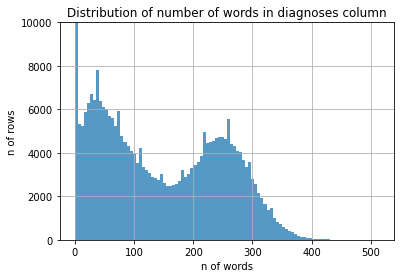

In [387]:
from matplotlib import pyplot as plt
plt.hist(df_previous_diags.previous_diags_titles.str.split().str.len(), bins=100, alpha=0.75)
plt.ylim([0, 10000])
plt.xlabel('n of words')
plt.ylabel('n of rows')
plt.title('Distribution of number of words in diagnoses column')
plt.grid(True)
plt.show()

## pretraining_df

### Loading dataframes

In [283]:
with open(PKL_PATH + 'hid_previous_diagnoses.pkl', 'rb') as f:
    df_previous_diags = pickle.load(f)

In [284]:
with open(PKL_PATH + 'labevents_creatinine.pkl', 'rb') as f:
    labevents_creatinine = pickle.load(f)

In [12]:
with open(PKL_PATH + 'pid_labevents.pkl', 'rb') as f:
    pid_labevents = pickle.load(f)

In [13]:
with open(PKL_PATH + 'pid_vitals.pkl', 'rb') as f:
    pid_vitals = pickle.load(f)

In [14]:
import pickle5 as pickle

with open(PKL_PATH + 'pid_medications.pkl', 'rb') as f:
    pid_medications = pickle.load(f)

In [15]:
with open(PKL_PATH + 'data_demographics.pkl', 'rb') as f:
    data_demographics = pickle.load(f)

In [18]:
# pid_aki_status
with open(PKL_PATH + 'aki_status_df.pkl', 'rb') as f:
    final_aki_status = pickle.load(f)

In [15]:
pid_medications['subject_id'] = pid_medications['subject_id'].astype(int)
pid_medications['hadm_id'] = pid_medications['hadm_id'].astype(int)
pid_medications['day_id'] = pid_medications['day_id'].astype(int)

In [16]:
print(pid_medications.shape)
print('unique admissions: ', pid_medications.hadm_id.unique().shape)
pid_medications.head()

(2735020, 4)
unique admissions:  (452097,)


,subject_id,hadm_id,day_id,medications
0,17868682,22726960,-1,BuPROPion (Sustained Release) {300} mg ; BuPRO...
1,17868682,22726960,0,BuPROPion (Sustained Release) {300} mg ; BuPRO...
2,17868682,22726960,1,BuPROPion (Sustained Release) {150} mg ; Pneum...
3,17868682,25218370,0,Sodium Chloride 0.9% Flush {3} mL ; Lactated ...
4,17868682,25218370,1,Sodium Chloride 0.9% Flush {3} mL ; Acetamino...


In [17]:
print(pid_labevents.shape)
print('unique admissions: ', pid_labevents.hadm_id.unique().shape)
pid_labevents.head(10)

(1828574, 4)
unique admissions:  (425573,)


,subject_id,hadm_id,day_id,lab_tests
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...
3,16925328,20000024,0,Hematology Blood hematocrit {32.1} %; Hematolo...
4,19430048,20000034,0,Hematology Blood hematocrit {30.3} %; Hematolo...
5,19430048,20000034,1,Hematology Blood hematocrit {31.9} %; Hematolo...
6,18910522,20000041,0,Hematology Blood hematocrit {28.2} %; Hematolo...
7,18910522,20000041,1,"Chemistry Blood bilirubin, total {0.5} mg/dL; ..."
8,18910522,20000041,2,Hematology Blood hematocrit {25.4} %; Hematolo...
9,11868001,20000055,2,"Chemistry Blood bilirubin, indirect {10.5} mg/..."


In [18]:
print(pid_vitals.shape)
print('unique admissions: ', pid_vitals.hadm_id.unique().shape)
pid_vitals.head()

(379306, 4)
unique admissions:  (208235,)


,subject_id,hadm_id,day_id,vitals
0,10467237,20000019,-1,temp {99.1} heartrate {75.0} resprate {16.0} o...
1,10467237,20000019,0,temp {98.0} heartrate {65.0} resprate {16.0} o...
2,16925328,20000024,-1,temp {98.7} heartrate {72.0} resprate {16.0} o...
3,16925328,20000024,0,temp {98.2} heartrate {53.0} resprate {18.0} o...
4,11146739,20000057,-1,temp {99.3} heartrate {81.0} resprate {16.0} o...


In [19]:
from functools import reduce

common_hadm_ids = list(reduce(set.intersection, map(set, [pid_labevents.hadm_id, pid_medications.hadm_id])))
print(f' number of common patients (labs + meds) {len(common_hadm_ids)}')

common_hadm_ids = list(reduce(set.intersection, map(set, [pid_labevents.hadm_id, pid_medications.hadm_id, pid_vitals.hadm_id])))
print(f' number of common patients (labs + meds + vitals) {len(common_hadm_ids)}')

 number of common patients (labs + meds) 413840
 number of common patients (labs + meds + vitals) 154791


### Making PID dataframe

Since labs and meds have a lot of admissions in common and vitals has much less admissions in common, we first inner joing labs amd meds, and then outer join vitals to the result. 

OR we outer join all 3 dataframes.

In [20]:
print(f'The number of patients in mimic {len(data_patients.subject_id.unique())}')
print(f'The number of admissions in mimic {len(data_admissions.hadm_id.unique())}')

The number of patients in mimic 382278
The number of admissions in mimic 523740


In [285]:
pid = pid_medications.merge(pid_labevents, how='outer', on=['subject_id', 'hadm_id', 'day_id'], suffixes=None)
pid = pid.merge(pid_vitals,  how='left', on=['subject_id', 'hadm_id', 'day_id'], suffixes=None)
pid = pid.merge(data_demographics[['subject_id', 'hadm_id', 'demographics']], how='inner')
pid = pid.merge(df_previous_diags, on='hadm_id', how='left')


/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' as a <class 'NoneType'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


In [286]:
print(pid.shape)
print(len(pid.hadm_id.unique()))

(2451076, 9)
402338


In [287]:
pid = pid.sort_values(['hadm_id', 'day_id'])

In [288]:
pid = pid.merge(final_aki_status, how='left', on=['hadm_id', 'day_id'])

In [234]:
print(pid.shape)
pid.head(6)

(2451076, 11)


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,previous_diags,AKI_1,AKI_2,AKI_3
0,10467237,20000019,0,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {26.5} %; Hematolo...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,0.0,0.0,0.0
1,10467237,20000019,1,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {28.1} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,0.0,0.0,0.0
2,10467237,20000019,2,PNEUMOcoccal 23-valent polysaccharide vaccine ...,Hematology Blood hematocrit {23.9} %; Hematolo...,NaN,HISPANIC/LATINO F 76.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...,0.0,0.0,0.0
3,16925328,20000024,0,OxyCODONE (Immediate Release) {2.5} mg ; Gabap...,Hematology Blood hematocrit {32.1} %; Hematolo...,temp {98.2} heartrate {53.0} resprate {18.0} o...,WHITE F 92.0,DW010XXA DI10 DS3210XA DM1990 DS32059A DY92000...,NaN,NaN,NaN
4,16925328,20000024,1,Sodium Chloride 0.9% Flush {3} mL ; Heparin {...,NaN,NaN,WHITE F 92.0,DW010XXA DI10 DS3210XA DM1990 DS32059A DY92000...,NaN,NaN,NaN
5,19430048,20000034,0,Influenza Vaccine Quadrivalent {0.5} mL ; Sodi...,Hematology Blood hematocrit {30.3} %; Hematolo...,NaN,BLACK/AFRICAN AMERICAN M 74.0,DZ8719 DF1011 DZ681 DK831 DR338 DN401 DZ794 DZ...,NaN,NaN,NaN


In [52]:
print(f'The numer of rows in the PID dataframe: {pid.shape[0] :,}')
print(f'The number of rows with NaN labels: {pid[pid.AKI_1.isna()].shape[0] :,} \n')

print(f'The number of unique admissions: {pid.hadm_id.unique().shape[0] :,} ')
ratio = sum(pid.AKI_1) / len(pid)
print(f'Number of admissions with AKI 1: {len(pid[pid.AKI_1==1].hadm_id.unique())}')
print(f'Number of admissions with AKI 2: {len(pid[pid.AKI_2==1].hadm_id.unique())}')
print(f'Number of admissions with AKI 3: {len(pid[pid.AKI_3==1].hadm_id.unique())}')
print(f'Number of admissions with AKI 2-3 onset during the first 14 days of their admission: {len(pid[(pid.AKI_2==1)&(pid.day_id<=13)].hadm_id.unique())} \n')

# print(f'Ratio of 1 in the dataset: {np.round(ratio, 3)}')

The numer of rows in the PID dataframe: 2,451,076
The number of rows with NaN labels: 1,381,688 

The number of unique admissions: 402,338 
Number of admissions with AKI 1: 31144
Number of admissions with AKI 2: 6871
Number of admissions with AKI 3: 2114
Number of admissions with AKI 2-3 onset during the first 14 days of their admission: 5971 



In [293]:
# PREPROCESSING
# lower case
# pid['day_info'] = pid['day_info'].str.lower()
# pid['day_info'] = pid['day_info'].replace(r'[{}/]', ' ',  regex=True)

# pid['lab_tests'] = pid['lab_tests'].str.lower()
# pid['lab_tests'] = pid['lab_tests'].replace(r'[{}/]', ' ',  regex=True)

# pid['medications'] = pid['medications'].str.lower()
# pid['medications'] = pid['medications'].replace(r'[{}/]', ' ',  regex=True)

# pid['vitals'] = pid['vitals'].str.lower()
# pid['vitals'] = pid['vitals'].replace(r'[{}/]', ' ',  regex=True)

# pid['demographics'] = pid['demographics'].str.lower()
# pid['demographics'] = pid['demographics'].replace(r'([{}/])|(.0$)', ' ',  regex=True)

pid['previous_diags_icd'] = pid['previous_diags_icd'].str.lower()
pid['previous_diags_titles'] = pid['previous_diags_titles'].str.lower()
pid.previous_diags_icd = pid.previous_diags_icd.fillna('')
pid.previous_diags_titles = pid.previous_diags_titles.fillna('')
# pid['previous_diags'] = pid['previous_diags'].replace(r'(PAD )|(PAD)', '',  regex=True)

In [294]:
pid['previous_diags_icd'] = pid['previous_diags_icd'].replace(r'  ', '',  regex=True)
pid['previous_diags_titles'] = pid['previous_diags_titles'].replace(r'  ', '',  regex=True)

In [298]:
with open(PKL_PATH + 'pid_402k.pkl', 'wb') as f:
    pickle.dump(pid, f, protocol=pickle.HIGHEST_PROTOCOL)

The graph below shows how many patients had AKI 2-3 onset on a particular day of their admission. We can see that most of the patients had AKI whithin the first 4-5 weeks (40 days) af their admission. Particulary, the peak is on the fisrt week.

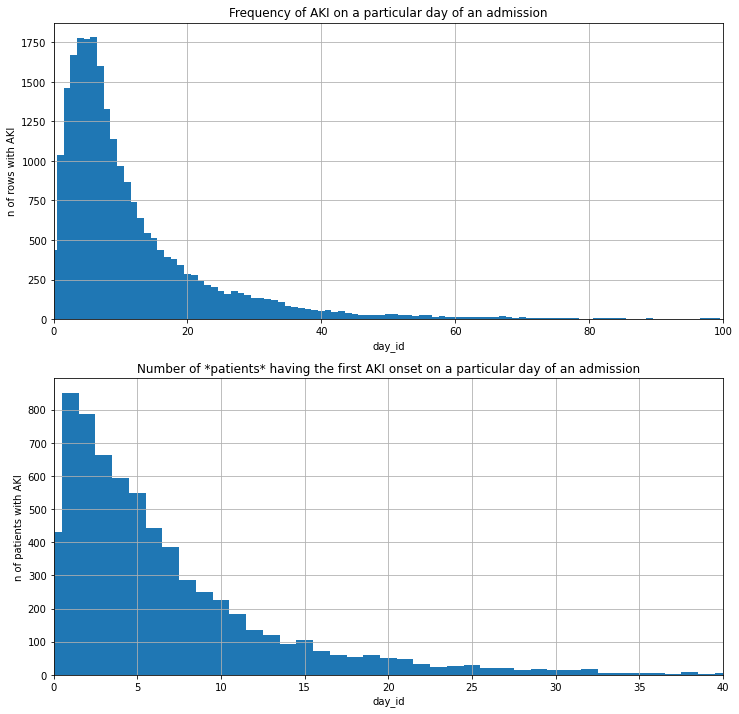

In [54]:
from matplotlib import pyplot as plt

g1 = pid[pid.AKI_2==1].groupby('day_id')
index1 = g1.count().AKI_2.sort_values(ascending=False).index
values1 = g1.count().AKI_2.sort_values(ascending=False).values

g2 = pid[pid.AKI_2==1].sort_values(['hadm_id', 'day_id'])\
                        .drop_duplicates(['hadm_id'], keep='first')\
                            .groupby('day_id')\
                                .count()
index2 = g2.AKI_2.sort_values(ascending=False).index
values2 = g2.AKI_2.sort_values(ascending=False).values

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharex=False) 

ax1.bar(index1, values1, width=1)
ax1.set_xlim([0,100])
ax1.set_xlabel('day_id')
ax1.set_ylabel('n of rows with AKI')
ax1.set_title('Frequency of AKI on a particular day of an admission')
ax1.grid(True)

ax2.bar(index2, values2, width=1)
ax2.set_xlim([0,40])
ax2.set_xlabel('day_id')
ax2.set_ylabel('n of patients with AKI')
ax2.set_title('Number of *patients* having the first AKI onset on a particular day of an admission')
ax2.grid(True)

### Manually checking some of the labels:

In [33]:
pid[pid.AKI_2==1].hadm_id.unique()[:10]

array([20000769, 20002497, 20005119, 20007226, 20007997, 20009330,
       20009349, 20010116, 20011286, 20012254])

In [36]:
adm = 20000769
labevents_creatinine[labevents_creatinine.hadm_id==adm]

,subject_id,hadm_id,charttime,value,valueuom,admittime,day_id
1009627,11082580,20000769,2167-08-31 13:44:00,0.7,mg/dL,2167-08-31 13:18:00,0.0
1009628,11082580,20000769,2167-09-01 00:31:00,0.6,mg/dL,2167-08-31 13:18:00,0.0
1009629,11082580,20000769,2167-09-02 05:24:00,1.1,mg/dL,2167-08-31 13:18:00,1.0
1009630,11082580,20000769,2167-09-02 10:47:00,1.1,mg/dL,2167-08-31 13:18:00,1.0
1009631,11082580,20000769,2167-09-02 16:41:00,1.1,mg/dL,2167-08-31 13:18:00,2.0
1009632,11082580,20000769,2167-09-02 20:52:00,1.3,mg/dL,2167-08-31 13:18:00,2.0
1009633,11082580,20000769,2167-09-03 02:43:00,1.1,mg/dL,2167-08-31 13:18:00,2.0
1009634,11082580,20000769,2167-09-03 08:44:00,0.9,mg/dL,2167-08-31 13:18:00,2.0


In [37]:
data_admissions[data_admissions.hadm_id==adm].admittime

297345    2167-08-31 13:18:00
Name: admittime, dtype: object

In [38]:
pid[pid.hadm_id==adm]

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,AKI_1,AKI_2,AKI_3
135,11082580,20000769,0,NaN,Hematology Blood hematocrit {34.1} %; Hematolo...,NaN,ASIAN F 43.0,0.0,0.0,0.0
136,11082580,20000769,1,NaN,Hematology Blood hematocrit {30.7} %; Hematolo...,NaN,ASIAN F 43.0,1.0,0.0,0.0
137,11082580,20000769,2,Sterile Water {500} mL ; Magnesium Sulfate (OB...,Hematology Blood hematocrit {25.0} %; Hematolo...,NaN,ASIAN F 43.0,1.0,1.0,0.0
138,11082580,20000769,3,Sterile Water {500} mL ; Magnesium Sulfate (OB...,NaN,NaN,ASIAN F 43.0,NaN,NaN,NaN
139,11082580,20000769,4,Sterile Water {500} mL ; Magnesium Sulfate (OB...,Hematology Blood hematocrit {20.1} %; Hematolo...,NaN,ASIAN F 43.0,NaN,NaN,NaN
140,11082580,20000769,5,Sterile Water {500} mL ; Magnesium Sulfate (OB...,NaN,NaN,ASIAN F 43.0,NaN,NaN,NaN
141,11082580,20000769,6,Sterile Water {500} mL ; Magnesium Sulfate (OB...,Hematology Blood hematocrit {21.1} %; Hematolo...,NaN,ASIAN F 43.0,NaN,NaN,NaN
142,11082580,20000769,7,Sterile Water {500} mL ; Magnesium Sulfate (OB...,NaN,NaN,ASIAN F 43.0,NaN,NaN,NaN


In [39]:
data_diagnoses[data_diagnoses.hadm_id==adm].merge(data_icd_diagnoses)

,subject_id,hadm_id,seq_num,icd_code,icd_version,long_title
0,11082580,20000769,5,O9902,10,Anemia complicating childbirth
1,11082580,20000769,12,O620,10,Primary inadequate contractions
2,11082580,20000769,10,Z3A39,10,39 weeks gestation of pregnancy
3,11082580,20000769,6,O99824,10,Streptococcus B carrier state complicating chi...
4,11082580,20000769,7,D563,10,Thalassemia minor
5,11082580,20000769,11,O76,10,Abnormality in fetal heart rate and rhythm com...
6,11082580,20000769,1,O4212,10,"Full-term premature rupture of membranes, onse..."
7,11082580,20000769,15,O621,10,Secondary uterine inertia
8,11082580,20000769,3,O721,10,Other immediate postpartum hemorrhage
9,11082580,20000769,2,N179,10,"Acute kidney failure, unspecified"


In [157]:
# with open(PKL_PATH + 'pid.pkl', 'wb') as f:
#     pickle.dump(pid, f, protocol=pickle.HIGHEST_PROTOCOL)

In [363]:
with open(PKL_PATH + 'pid.pkl', 'rb') as f:
    pid = pickle.load(f)

In [364]:
pid = pid.merge(df_previous_diags, on='hadm_id', how='left')
pid

,subject_id,hadm_id,day_id,lab_tests,medications,vitals,demographics,aki_status,previous_diags
0,10467237,20000019,0,Hematology Blood hematocrit {26.5} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,temp {98.0} heartrate {65.0} resprate {16.0} o...,HISPANIC/LATINO F 76.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
1,10467237,20000019,1,Hematology Blood hematocrit {28.1} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN,HISPANIC/LATINO F 76.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
2,10467237,20000019,2,Hematology Blood hematocrit {23.9} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN,HISPANIC/LATINO F 76.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
3,18910522,20000041,0,Hematology Blood hematocrit {28.2} %; Hematolo...,Aspirin {81} mg ; Bisacodyl {10} mg ; Ezetimib...,NaN,WHITE F 63.0,0.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
4,18910522,20000041,2,Hematology Blood hematocrit {25.4} %; Hematolo...,Aspirin {81} mg ; Bisacodyl {10} mg ; Ezetimib...,NaN,WHITE F 63.0,NaN,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
...,...,...,...,...,...,...,...,...,...
974272,12133002,29999809,2,Hematology Blood hematocrit {37.5} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Docusate ...,NaN,WHITE M 79.0,1.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
974273,12133002,29999809,3,Hematology Blood hematocrit {38.2} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Docusate ...,NaN,WHITE M 79.0,1.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
974274,12133002,29999809,4,Hematology Blood hematocrit {36.6} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Docusate ...,NaN,WHITE M 79.0,1.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...
974275,12133002,29999809,5,Hematology Blood hematocrit {41.6} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Docusate ...,NaN,WHITE M 79.0,1.0,PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PA...


### Get labels 

We first separate pretraining subject_ids from fine-tuning ones. We take 20,000 patients with AKI during the first 14 days of the admission + 20,000 patients with no AKI. 

Then, we calculate labels for these patients and make fine-tuning set.

We exclude patients ids which we use for FT from pretraining set.

In [192]:
# get 20,000 positive patients (AKI within first 14 days of the admission)
hadm_ids_aki_within_14_days = pid[(pid.aki_status==1)&(pid.day_id<=13)]\
                                    .drop_duplicates(subset=['hadm_id'])\
                                        .sample(n=20000).hadm_id.to_list()
print(len(hadm_ids_aki_within_14_days))

# get negative patients (no AKI during the admission)
pos_ids = pid[pid.aki_status==1].hadm_id.unique()
hadm_ids_NO_aki = pid[~pid.hadm_id.isin(pos_ids)]\
                        .drop_duplicates(subset=['hadm_id'])\
                            .sample(n=20000).hadm_id.to_list()
print(len(hadm_ids_NO_aki))

# fine-tuning dataset

ft_pid = pid[pid.hadm_id.isin(hadm_ids_aki_within_14_days + hadm_ids_NO_aki)]
ft_admissions = ft_pid.hadm_id.unique().tolist()
print(f'number of admissions for Fine-Tuning: {len(ft_admissions)}')

20000
20000
number of admissions for Fine-Tuning: 40000


In [469]:
pd.options.mode.chained_assignment = None

def get_labels(adm, pid=ft_pid):
    d = 1
    pid_adm = pid[pid.hadm_id==adm].copy().reset_index().sort_values('day_id')
    pid_labels = pid_adm[['subject_id', 'hadm_id', 'day_id', 'aki_status']]
    counter = len(pid_adm)
    
    for d in range(1, 8):
        # print('d ', d)
        col_name = 'aki_in_' + str(d) + '_days'
        if counter:
            # print('counter', counter)
            labels = (list(pid_adm.aki_status.values)[d:])
            # print('labels: ', labels)
            # print('labels + [np.nan]*d: ', labels + [np.nan]*d)
            pid_labels[col_name] = labels + [np.nan]*d
            counter = counter - 1
        else:
            pid_labels[col_name] = [np.nan] * len(pid_adm)

    return pid_labels

In [473]:
len(ft_admissions)

40000

In [470]:
%%time
import traceback
import multiprocessing

df_labels = pd.DataFrame()
admissions = ft_admissions
chunk_size = 20000
n_chunks = len(admissions)//chunk_size
errors = []

for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=87) as pool_obj:
        temp = pool_obj.map(get_labels, admissions[i*chunk_size:(i+1)*chunk_size])

    for e in temp:
        df_labels = pd.concat([df_labels, e], ignore_index=True)

    print("Finished {} admissions. Saving...".format((i+1)*chunk_size))

    with open(PKL_PATH + 'df_labels.pkl', 'wb') as f:
        pickle.dump(df_labels, f, protocol=pickle.HIGHEST_PROTOCOL)

Finished 20000 admissions. Saving...
Finished 40000 admissions. Saving...
Finished 60000 admissions. Saving...
CPU times: user 3min 9s, sys: 1min 3s, total: 4min 12s
Wall time: 4min 49s


In [710]:
len(ft_pid.hadm_id.unique())

40000

In [482]:
pid_with_labels = ft_pid.merge(df_labels)
print(pid_with_labels.shape)
pid_with_labels.head()

(327010, 15)


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,aki_status,aki_in_1_days,aki_in_2_days,aki_in_3_days,aki_in_4_days,aki_in_5_days,aki_in_6_days,aki_in_7_days
0,10003299.0,21476780,-1.0,NaN,Hematology Blood hematocrit {39.5} %; Hematolo...,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10003299.0,21476780,0.0,Sodium Chloride 0.9% Flush {3-10} mL ; Senna ...,Hematology Blood hematocrit {37.9} %; Hematolo...,temp {99.1} heartrate {55.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10005348.0,29496232,0.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,Hematology Blood hematocrit {32.5} %; Hematolo...,NaN,WHITE M 76.0,0.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN
3,10005348.0,29496232,1.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,Hematology Blood hematocrit {31.6} %; Hematolo...,NaN,WHITE M 76.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN
4,10005348.0,29496232,2.0,Aspirin {325} mg ; Citalopram {20} mg ; Atorva...,NaN,NaN,WHITE M 76.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN


In [488]:
# n of admissoins with labels for all  7 days
pid_with_labels[~(pid_with_labels.aki_in_1_days.isna() | pid_with_labels.aki_in_2_days.isna() | pid_with_labels.aki_in_3_days.isna()\
    | pid_with_labels.aki_in_4_days.isna()| pid_with_labels.aki_in_5_days.isna()| pid_with_labels.aki_in_6_days.isna()\
        | pid_with_labels.aki_in_7_days.isna())]\
            .hadm_id.unique().shape[0]

11491

In [ ]:
def difference(lst1, lst2):
    lst3 = [value for value in lst1 if value not in lst2]
    #return lst3
    return lst3

In [519]:
pid_with_labels['day_info'] = pid_with_labels['demographics'].astype(str) + '$' +  pid_with_labels['vitals'].astype(str) + '$' + pid_with_labels['lab_tests'].astype(str) + '$' + pid_with_labels['medications'].astype(str)

In [491]:
pid_with_labels = pid_with_labels[['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'aki_status', \
    'aki_in_1_days',	'aki_in_2_days'	,'aki_in_3_days',	'aki_in_4_days',	'aki_in_5_days',	'aki_in_6_days',	'aki_in_7_days' ]]

In [520]:
pid_with_labels.head(2)

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status,aki_in_1_days,aki_in_2_days,aki_in_3_days,aki_in_4_days,aki_in_5_days,aki_in_6_days,aki_in_7_days
0,10003299.0,21476780,-1.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {39.5} %; Hematolo...,NaN,temp {97.7} heartrate {63.0} resprate {15.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {97.7} hear...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,10003299.0,21476780,0.0,BLACK/AFRICAN AMERICAN F 75.0,Hematology Blood hematocrit {37.9} %; Hematolo...,Sodium Chloride 0.9% Flush {3-10} mL ; Senna ...,temp {99.1} heartrate {55.0} resprate {20.0} o...,BLACK/AFRICAN AMERICAN F 75.0$temp {99.1} hear...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [493]:
pid_with_labels.loc[0,-1]

nan

In [893]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.04 # test + val size
VAL_SIZE = 0.5
print('n unique admissions: ', len(pid_1day_labels_cleaned.hadm_id.unique()))
train_adms, test_adms = train_test_split(pid_1day_labels_cleaned.hadm_id.unique(), test_size=TEST_SIZE)
test_adms, val_adms = train_test_split(test_adms, test_size=VAL_SIZE)
print('n train admissions: ', len(train_adms))
print('n test admissions: ', len(test_adms))
print('n val admissions: ', len(val_adms))



Splitting training and testing datsets...
n unique admissions:  165503
n train admissions:  158882
n test admissions:  3310
n val admissions:  3311


### Save df for Pre-training

In [12]:
# get ft_admissions
with open('/home/svetlanamaslenkova/Documents/AKI_ml/dataframes' + '/dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

ft_admissions = list(dataset.hadm_id.unique())
print(dataset.shape)
print(len(ft_admissions))

(8853, 76)
8853


In [13]:
# pid_noAKIstatus_463k
with open(PKL_PATH + 'pid_402k.pkl', 'rb') as f:
    pid_402k = pickle.load(f)

print(pid_402k.hadm_id.unique().shape[0])
pid_402k.head(1)

402338


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,previous_diags_icd,previous_diags_titles,AKI_1,AKI_2,AKI_3
0,10467237.0,20000019.0,0.0,pneumococcal 23-valent polysaccharide vaccine ...,hematology blood hematocrit 26.5 %; hematolo...,temp 98.0 heartrate 65.0 resprate 16.0 o...,hispanic latino f 76,,,0.0,0.0,0.0


In [14]:
pretraining_df = pid_402k[~pid_402k.hadm_id.isin(ft_admissions)]
pretraining_df.hadm_id.unique().shape[0]

393485

In [15]:
pretraining_df['day_info'] = pretraining_df['demographics'].astype(str) + '$' +  pretraining_df['vitals'].astype(str) + '$' + pretraining_df['lab_tests'].astype(str) + '$' + pretraining_df['medications'].astype(str)

/home/svetlanamaslenkova/anaconda_envs/aki_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
# # PREPROCESSING
# # lower case
# pretraining_df['day_info'] = pretraining_df['day_info'].str.lower()
# pretraining_df['day_info'] = pretraining_df['day_info'].replace(r'[{}/]', ' ',  regex=True)

# pretraining_df['lab_tests'] = pretraining_df['lab_tests'].str.lower()
# pretraining_df['lab_tests'] = pretraining_df['lab_tests'].replace(r'[{}/]', ' ',  regex=True)

# pretraining_df['medications'] = pretraining_df['medications'].str.lower()
# pretraining_df['medications'] = pretraining_df['medications'].replace(r'[{}/]', ' ',  regex=True)

# pretraining_df['vitals'] = pretraining_df['vitals'].str.lower()
# pretraining_df['vitals'] = pretraining_df['vitals'].replace(r'[{}/]', ' ',  regex=True)

# pretraining_df['demographics'] = pretraining_df['demographics'].str.lower()
# pretraining_df['demographics'] = pretraining_df['demographics'].replace(r'([{}/])|(.0$)', ' ',  regex=True)

# pretraining_df['previous_diags'] = pretraining_df['previous_diags'].str.lower()
# pretraining_df['previous_diags'] = pretraining_df['previous_diags'].replace(r'[pad ]', ' ',  regex=True)

In [308]:
print(pretraining_df.shape)
pretraining_df.head(1)

(2391343, 13)


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,previous_diags_icd,previous_diags_titles,AKI_1,AKI_2,AKI_3,day_info
3,16925328.0,20000024.0,0.0,oxycodone (immediate release) 2.5 mg ; gabap...,hematology blood hematocrit 32.1 %; hematolo...,temp 98.2 heartrate 53.0 resprate 18.0 o...,white f 92,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",NaN,NaN,NaN,white f 92 $temp 98.2 heartrate 53.0 respr...


In [16]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
VAL_SIZE = 0.008

print('n unique admissions: ', len(pretraining_df.hadm_id.unique()))
train_adms, val_adms = train_test_split(pretraining_df.hadm_id.unique(), test_size=VAL_SIZE, random_state=42)

print('n train admissions: ', len(train_adms))
print('n val admissions: ', len(val_adms))

Splitting training and testing datsets...
n unique admissions:  393485
n train admissions:  390337
n val admissions:  3148


In [17]:
train_df_pre = pretraining_df[pretraining_df.hadm_id.isin(train_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'previous_diags_icd', 'previous_diags_titles', 'day_info']]
val_df_pre = pretraining_df[pretraining_df.hadm_id.isin(val_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'previous_diags_icd', 'previous_diags_titles', 'day_info']]

In [311]:
len(train_df_pre)

2372741

In [312]:
# save data frames
DF_PATH = "/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/"

with open(DF_PATH + 'train_df_pretraining.pkl', 'wb') as f:
    pickle.dump(train_df_pre, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'val_df_pretraining.pkl', 'wb') as f:
    pickle.dump(val_df_pre, f, protocol=pickle.HIGHEST_PROTOCOL)

In [288]:
train_df_pre.head()

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,previous_diags,day_info
3,16925328,20000024,0,WHITE F 92,Hematology Blood hematocrit 32.1 %; Hematolo...,OxyCODONE (Immediate Release) 2.5 mg ; Gabap...,temp 98.2 heartrate 53.0 resprate 18.0 o...,DW010XXA DI10 DS3210XA DM1990 DS32059A DY92000...,WHITE F 92 $temp 98.2 heartrate 53.0 respr...
4,16925328,20000024,1,WHITE F 92,NaN,Sodium Chloride 0.9% Flush 3 mL ; Heparin ...,NaN,DW010XXA DI10 DS3210XA DM1990 DS32059A DY92000...,WHITE F 92 $nan$nan$Sodium Chloride 0.9% Flus...
5,19430048,20000034,0,BLACK AFRICAN AMERICAN M 74,Hematology Blood hematocrit 30.3 %; Hematolo...,Influenza Vaccine Quadrivalent 0.5 mL ; Sodi...,NaN,DZ8719 DF1011 DZ681 DK831 DR338 DN401 DZ794 DZ...,BLACK AFRICAN AMERICAN M 74 $nan$Hematology Bl...
6,19430048,20000034,1,BLACK AFRICAN AMERICAN M 74,Hematology Blood hematocrit 31.9 %; Hematolo...,Influenza Vaccine Quadrivalent 0.5 mL ; Sodi...,NaN,DZ8719 DF1011 DZ681 DK831 DR338 DN401 DZ794 DZ...,BLACK AFRICAN AMERICAN M 74 $nan$Hematology Bl...
7,19430048,20000034,2,BLACK AFRICAN AMERICAN M 74,NaN,Influenza Vaccine Quadrivalent 0.5 mL ; Sodi...,NaN,DZ8719 DF1011 DZ681 DK831 DR338 DN401 DZ794 DZ...,BLACK AFRICAN AMERICAN M 74 $nan$nan$Influenza...


### Save for Fine-Tuning

In [24]:
pid = pid_402k.copy()

In [25]:
pid['day_info'] = pid['demographics'].astype(str) + '$' +  pid['vitals'].astype(str) + '$' + pid['lab_tests'].astype(str) + '$' + pid['medications'].astype(str)

In [26]:
pid.head(2)

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,previous_diags_icd,previous_diags_titles,AKI_1,AKI_2,AKI_3,day_info
0,10467237.0,20000019.0,0.0,pneumococcal 23-valent polysaccharide vaccine ...,hematology blood hematocrit 26.5 %; hematolo...,temp 98.0 heartrate 65.0 resprate 16.0 o...,hispanic latino f 76,,,0.0,0.0,0.0,hispanic latino f 76 $temp 98.0 heartrate 6...
1,10467237.0,20000019.0,1.0,pneumococcal 23-valent polysaccharide vaccine ...,hematology blood hematocrit 28.1 %; hematolo...,NaN,hispanic latino f 76,,,0.0,0.0,0.0,hispanic latino f 76 $nan$hematology blood hem...


In [442]:
# get 20,000 positive patients (AKI within first 14 days of the admission)

# hadm_ids_aki_within_14_days = pid[(pid.aki_status==1)&(pid.day_id<=13)]\
#                                     .drop_duplicates(subset=['hadm_id'])\
#                                         .sample(n=20000).hadm_id.to_list()
# print(len(hadm_ids_aki_within_14_days))

hadm_ids_aki_within_6_days = pid[(pid.aki_status==1)&(pid.day_id<=5)]\
                                    .drop_duplicates(subset=['hadm_id'])\
                                        .hadm_id.to_list()
print(len(hadm_ids_aki_within_6_days))

# get negative patients (no AKI during the admission)
pos_ids = pid[pid.aki_status==1].hadm_id.unique()
hadm_ids_NO_aki = pid[~pid.hadm_id.isin(pos_ids)]\
                        .drop_duplicates(subset=['hadm_id'])\
                            .sample(n=20000).hadm_id.to_list()
print(len(hadm_ids_NO_aki))

# fine-tuning dataset

# ft_pid = pid[pid.hadm_id.isin(hadm_ids_aki_within_14_days + hadm_ids_NO_aki)]
ft_pid = pid[pid.hadm_id.isin(hadm_ids_aki_within_6_days + hadm_ids_NO_aki)]
ft_admissions = ft_pid.hadm_id.unique().tolist()
print(f'number of admissions for Fine-Tuning: {len(ft_admissions)}')

17287
20000
number of admissions for Fine-Tuning: 37287


In [21]:
ft_pid =  pid[pid.hadm_id.isin(ft_admissions)]

In [316]:
print('Splitting training and testing datsets...')
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.2
VAL_SIZE = 0.5

print('n unique admissions: ', len(ft_pid.hadm_id.unique()))

train_adms, temp_adms = train_test_split(ft_pid.hadm_id.unique(), test_size=TEST_SIZE, random_state=42)
test_adms, val_adms = train_test_split(temp_adms, test_size=VAL_SIZE, random_state=42)

print('n train admissions: ', len(train_adms))
print('n test admissions: ', len(test_adms))
print('n val admissions: ', len(val_adms))

Splitting training and testing datsets...
n unique admissions:  8853
n train admissions:  7082
n test admissions:  885
n val admissions:  886


In [318]:
train_df_finetuning = ft_pid[ft_pid.hadm_id.isin(train_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'previous_diags_icd', 'previous_diags_titles', 'AKI_1', 'AKI_2', 'AKI_3']]
test_df_finetuning = ft_pid[ft_pid.hadm_id.isin(test_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals','day_info', 'previous_diags_icd', 'previous_diags_titles','AKI_1', 'AKI_2', 'AKI_3' ]]
val_df_finetuning = ft_pid[ft_pid.hadm_id.isin(val_adms)][['subject_id', 'hadm_id', 'day_id', 'demographics', 'lab_tests', 'medications', 'vitals', 'day_info', 'previous_diags_icd', 'previous_diags_titles', 'AKI_1', 'AKI_2', 'AKI_3']]

In [319]:
ft_admissions = train_df_finetuning.hadm_id.unique().tolist() \
                    + test_df_finetuning.hadm_id.unique().tolist() \
                        + val_df_finetuning.hadm_id.unique().tolist()
len(ft_admissions)

8853

In [320]:
print(train_df_finetuning.hadm_id.unique().shape[0])
train_df_finetuning.head(1)

7082


,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,previous_diags_icd,previous_diags_titles,AKI_1,AKI_2,AKI_3
143,16788749.0,20000808.0,-1.0,white f 54,NaN,fluticasone propionate nasal 1 spry ; sertra...,NaN,white f 54 $nan$nan$fluticasone propionate nas...,,,NaN,NaN,NaN


In [321]:
with open(DF_PATH + 'train_df_finetuning.pkl', 'wb') as f:
   pickle.dump(train_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'test_df_finetuning.pkl', 'wb') as f:
   pickle.dump(test_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'val_df_finetuning.pkl', 'wb') as f:
   pickle.dump(val_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

In [88]:
# DF_PATH = "/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/"

# with open(DF_PATH + 'train_df_finetuning.pkl', 'rb') as f:
#    train_df_finetuning = pickle.load(f)

# with open(DF_PATH + 'test_df_finetuning.pkl', 'rb') as f:
#     test_df_finetuning = pickle.load(f)

# with open(DF_PATH + 'val_df_finetuning.pkl', 'rb') as f:
#    val_df_finetuning = pickle.load(f)


In [ ]:
# from functools import reduce

# print('Number of patients in train_df_finetuning: ', train_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_train = list(reduce(set.intersection, map(set, [train_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_train)}')

# print('\nNumber of patients in test_df_finetuning: ', test_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_test = list(reduce(set.intersection, map(set, [test_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_test)}')

# print('\nNumber of patients in test_df_finetuning: ', val_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_val = list(reduce(set.intersection, map(set, [val_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_val)}')

In [95]:
print('n samples in train_df', len(train_df_finetuning))
print('n samples in test_df', len(test_df_finetuning))
print('n samples in val_df', len(val_df_finetuning))

n samples in train_df 47782
n samples in test_df 6051
n samples in val_df 5900


### Save files for tokenizer

In [335]:
# with open(DF_PATH + 'train_df.pkl', 'rb') as f:
#     train_df = pickle.load(f)
with open(DF_PATH + 'train_df_pretraining.pkl', 'rb') as f:
    train_df = pickle.load(f)

In [327]:
print(train_df.shape)
train_df.head()

(2372741, 10)


,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,previous_diags_icd,previous_diags_titles,day_info
3,16925328.0,20000024.0,0.0,white f 92,hematology blood hematocrit 32.1 %; hematolo...,oxycodone (immediate release) 2.5 mg ; gabap...,temp 98.2 heartrate 53.0 resprate 18.0 o...,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",white f 92 $temp 98.2 heartrate 53.0 respr...
4,16925328.0,20000024.0,1.0,white f 92,NaN,sodium chloride 0.9% flush 3 ml ; heparin ...,NaN,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",white f 92 $nan$nan$sodium chloride 0.9% flus...
5,19430048.0,20000034.0,0.0,black african american m 74,hematology blood hematocrit 30.3 %; hematolo...,influenza vaccine quadrivalent 0.5 ml ; sodi...,NaN,dz8719 dn184 de83119 dk861 dz8619 dj439 dr338 ...,personal history of other diseases of the dige...,black african american m 74 $nan$hematology bl...
6,19430048.0,20000034.0,1.0,black african american m 74,hematology blood hematocrit 31.9 %; hematolo...,influenza vaccine quadrivalent 0.5 ml ; sodi...,NaN,dz8719 dn184 de83119 dk861 dz8619 dj439 dr338 ...,personal history of other diseases of the dige...,black african american m 74 $nan$hematology bl...
7,19430048.0,20000034.0,2.0,black african american m 74,NaN,influenza vaccine quadrivalent 0.5 ml ; sodi...,NaN,dz8719 dn184 de83119 dk861 dz8619 dj439 dr338 ...,personal history of other diseases of the dige...,black african american m 74 $nan$nan$influenza...


In [323]:
print(pid.shape)
pid.head()

(2451076, 13)


,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,previous_diags_icd,previous_diags_titles,AKI_1,AKI_2,AKI_3,day_info
0,10467237.0,20000019.0,0.0,pneumococcal 23-valent polysaccharide vaccine ...,hematology blood hematocrit 26.5 %; hematolo...,temp 98.0 heartrate 65.0 resprate 16.0 o...,hispanic latino f 76,,,0.0,0.0,0.0,hispanic latino f 76 $temp 98.0 heartrate 6...
1,10467237.0,20000019.0,1.0,pneumococcal 23-valent polysaccharide vaccine ...,hematology blood hematocrit 28.1 %; hematolo...,NaN,hispanic latino f 76,,,0.0,0.0,0.0,hispanic latino f 76 $nan$hematology blood hem...
2,10467237.0,20000019.0,2.0,pneumococcal 23-valent polysaccharide vaccine ...,hematology blood hematocrit 23.9 %; hematolo...,NaN,hispanic latino f 76,,,0.0,0.0,0.0,hispanic latino f 76 $nan$hematology blood hem...
3,16925328.0,20000024.0,0.0,oxycodone (immediate release) 2.5 mg ; gabap...,hematology blood hematocrit 32.1 %; hematolo...,temp 98.2 heartrate 53.0 resprate 18.0 o...,white f 92,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",NaN,NaN,NaN,white f 92 $temp 98.2 heartrate 53.0 respr...
4,16925328.0,20000024.0,1.0,sodium chloride 0.9% flush 3 ml ; heparin ...,NaN,NaN,white f 92,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",NaN,NaN,NaN,white f 92 $nan$nan$sodium chloride 0.9% flus...


In [328]:
# PREPROCESSING
# lower case
# pid['day_info'] = pid['day_info'].str.lower()
# pid['day_info'] = pid['day_info'].replace(r'[{}/]', ' ',  regex=True)

pid['lab_tests'] = pid['lab_tests'].str.lower()
pid['lab_tests'] = pid['lab_tests'].replace(r'[{}/]', ' ',  regex=True)

pid['medications'] = pid['medications'].str.lower()
pid['medications'] = pid['medications'].replace(r'[{}/]', ' ',  regex=True)

pid['vitals'] = pid['vitals'].str.lower()
pid['vitals'] = pid['vitals'].replace(r'[{}/]', ' ',  regex=True)

pid['demographics'] = pid['demographics'].str.lower()
pid['demographics'] = pid['demographics'].replace(r'[{}/.0]', ' ',  regex=True)

In [336]:
train_df = pid[(pid.hadm_id.isin(train_df_pre.hadm_id.unique())|(pid.hadm_id.isin(train_df_finetuning)))]

In [638]:
# DF_PATH = "/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/"

# with open(DF_PATH + 'train_df_finetuning.pkl', 'rb') as f:
#    train_df_finetuning = pickle.load(f)

# with open(DF_PATH + 'test_df_finetuning.pkl', 'rb') as f:
#     test_df_finetuning = pickle.load(f)

# with open(DF_PATH + 'val_df_finetuning.pkl', 'rb') as f:
#    val_df_finetuning = pickle.load(f)

In [ ]:
# from functools import reduce

# print('Number of patients in train_df_finetuning: ', train_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_train = list(reduce(set.intersection, map(set, [train_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_train)}')

# print('\nNumber of patients in test_df_finetuning: ', test_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_test = list(reduce(set.intersection, map(set, [test_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_test)}')

# print('\nNumber of patients in test_df_finetuning: ', val_df_finetuning.hadm_id.unique().shape[0])
# common_hadm_ids_val = list(reduce(set.intersection, map(set, [val_df_finetuning.hadm_id, pid.hadm_id])))
# print(f' number of common patients {len(common_hadm_ids_val)}')

In [838]:
print('n samples in train_df', len(train_df_finetuning))
print('n samples in test_df', len(test_df_finetuning))
print('n samples in val_df', len(val_df_finetuning))

n samples in train_df 315517
n samples in test_df 27001
n samples in val_df 27185


## Save files for tokenizer

In [362]:
data_for_tokenizer = train_df.copy()
data_for_tokenizer.loc[data_for_tokenizer.duplicated(subset=['previous_diags_titles']), 'previous_diags_titles'] = ''
data_for_tokenizer.loc[data_for_tokenizer.duplicated(subset=['previous_diags_icd']), 'previous_diags_icd'] = ''
data_for_tokenizer.head(2)

,subject_id,hadm_id,day_id,medications,lab_tests,vitals,demographics,previous_diags_icd,previous_diags_titles,AKI_1,AKI_2,AKI_3,day_info
3,16925328.0,20000024.0,0.0,oxycodone (immediate release) 2.5 mg ; gabap...,hematology blood hematocrit 32.1 %; hematolo...,temp 98.2 heartrate 53.0 resprate 18.0 o...,white f 92,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",NaN,NaN,NaN,white f 92 $temp 98.2 heartrate 53.0 respr...
4,16925328.0,20000024.0,1.0,sodium chloride 0.9% flush 3 ml ; heparin ...,NaN,NaN,white f 92,,,NaN,NaN,NaN,white f 92 $nan$nan$sodium chloride 0.9% flus...


In [363]:
from tqdm.auto import tqdm
num_samples = 50000
def create_text_seq(data, txt_dir):
    text_data = []
    file_count = 0

    for _, sample in tqdm(data.iterrows()):
        text_data.append(sample['day_info'])
        text_data.append(sample['previous_diags_icd'])
        if len(text_data) == num_samples:
            # once we hit the 5K mark, save to file
            if not os.path.exists(txt_dir):
                os.makedirs(txt_dir)
            with open(f'{txt_dir}/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
                fp.write('\n'.join(text_data))
            text_data = []
            file_count += 1
            print(f"Saved {num_samples + (num_samples * (file_count - 1))} samples")

    if (len(data) % num_samples) != 0:
        with open(f'{txt_dir}/text_{file_count}.txt', 'w', encoding='utf-8') as fp:
            fp.write('\n'.join(text_data))
        print(f"Saved {num_samples + (num_samples * (file_count - 1)) + len(text_data)} samples")

In [364]:
%%time
TXT_DIR_TRAIN = '/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/txt_files/train'
create_text_seq(data=data_for_tokenizer, txt_dir=TXT_DIR_TRAIN)

0it [00:00, ?it/s]

Saved 50000 samples
Saved 100000 samples
Saved 150000 samples
Saved 200000 samples
Saved 250000 samples
Saved 300000 samples
Saved 350000 samples
Saved 400000 samples
Saved 450000 samples
Saved 500000 samples
Saved 550000 samples
Saved 600000 samples
Saved 650000 samples
Saved 700000 samples
Saved 750000 samples
Saved 800000 samples
Saved 850000 samples
Saved 900000 samples
Saved 950000 samples
Saved 1000000 samples
Saved 1050000 samples
Saved 1100000 samples
Saved 1150000 samples
Saved 1200000 samples
Saved 1250000 samples
Saved 1300000 samples
Saved 1350000 samples
Saved 1400000 samples
Saved 1450000 samples
Saved 1500000 samples
Saved 1550000 samples
Saved 1600000 samples
Saved 1650000 samples
Saved 1700000 samples
Saved 1750000 samples
Saved 1800000 samples
Saved 1850000 samples
Saved 1900000 samples
Saved 1950000 samples
Saved 2000000 samples
Saved 2050000 samples
Saved 2100000 samples
Saved 2150000 samples
Saved 2200000 samples
Saved 2250000 samples
Saved 2300000 samples
Saved 23

In [361]:
# read some txt
i = 0
with open(TXT_DIR_TRAIN+'/text_0.txt') as f:
    for line in f:
        print(line)
        print('-----------------------------------------')
        i = i + 1
        if i > 3:
            break
f.close()

white f 92 $temp  98.2  heartrate  53.0  resprate  18.0  o2sat  99.0  sbp  141.0  dbp  76.0  rhythm    pain  0  $hematology blood hematocrit  32.1  %; hematology blood hemoglobin  10.3  g dl; hematology blood platelet count  196  k ul; chemistry blood anion gap  16  meq l; chemistry blood bicarbonate  25  meq l; chemistry blood chloride  104  meq l; chemistry blood creatinine  1.1  mg dl; chemistry blood potassium  5.2  meq l; chemistry blood sodium  140  meq l; chemistry blood urea nitrogen  28  mg dl; hematology blood inr(pt)  1.0  ; chemistry blood calcium, total  9.3  mg dl; chemistry blood glucose  88  mg dl$oxycodone (immediate release)  2.5  mg ; gabapentin  100  mg ; thiamine  100  mg ; folic acid  1  mg ; sodium chloride 0.9%  flush  3  ml ; heparin  5000  unit ; oxycodone (immediate release)  5  mg ; acetaminophen  650  mg ; docusate sodium  100  mg ; acetaminophen  1000  mg ; polyethylene glycol  17  g ; 

-----------------------------------------
unspecified fracture of fif

In [ ]:
# 2650
import nltk

maxlen = -1
for doc in train_df.day_info:
    tokens = nltk.word_tokenize(doc)
    if(maxlen < len(tokens)):
        maxlen = len(tokens)
print('the maximum len is ', maxlen)

In [454]:
from tokenizers import  Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace
import glob

os.environ["TOKENIZERS_PARALLELISM"] = "true"
tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
tokenizer.pre_tokenizer = Whitespace()
trainer = BpeTrainer(special_tokens=["[PAD]", "[UNK]", '[pad]'], min_frequency=5)
files = glob.glob(TXT_DIR_TRAIN+'/*')
tokenizer.train(files, trainer)
os.environ["TOKENIZERS_PARALLELISM"] = "false"

tokenizer.save(CURR_PATH+"/tokenizer.json")

In [453]:
vocab_size = tokenizer.get_vocab_size()
print(f' vocab_size = {vocab_size}')

 vocab_size = 26153


In [455]:
# testing cell
text = "hispanic latino f 76$nan$hematology blood hematocrit  28.1  %; hematology blood hemoglobin  9.7  g dl; hematology blood platelet count  195  k ul; chemistry blood anion gap  12  meq l; chemistry blood bicarbonate  28  meq l; chemistry blood chloride  100  meq l; chemistry blood creatinine  1.2  mg dl; chemistry blood potassium  3.7  meq l; chemistry blood sodium  136  meq l; chemistry blood urea nitrogen  17  mg dl; chemistry blood calcium, total  8.8  mg dl; chemistry blood glucose  190  mg dl$pneumococcal 23-valent polysaccharide vaccine  0.5  ml ; sodium chloride 0.9%  flush  3  ml ; 0.9% sodium chloride  1000  ml ; polyethylene glycol  17  g ; insulin  0  unit ; dextrose 50%  12.5  gm ; glucagon  1  mg ; glucose gel  15  g ; docusate sodium  100  mg ; heparin  5000  unit ; aspirin  81  mg ; ceftriaxone  2  gm ; bag  100  ml ; magnesium sulfate  4  gm ; simvastatin  40  mg ; ciprofloxacin hcl  500  mg ; $pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad pad"
output = tokenizer.encode(text)
max_length = 128

print(output.tokens)
print(output.ids)

['hispanic', 'latino', 'f', '76', '$', 'nan', '$', 'hematology', 'blood', 'hematocrit', '28', '.', '1', '%;', 'hematology', 'blood', 'hemoglobin', '9', '.', '7', 'g', 'dl', ';', 'hematology', 'blood', 'platelet', 'count', '195', 'k', 'ul', ';', 'chemistry', 'blood', 'anion', 'gap', '12', 'meq', 'l', ';', 'chemistry', 'blood', 'bicarbonate', '28', 'meq', 'l', ';', 'chemistry', 'blood', 'chloride', '100', 'meq', 'l', ';', 'chemistry', 'blood', 'creatinine', '1', '.', '2', 'mg', 'dl', ';', 'chemistry', 'blood', 'potassium', '3', '.', '7', 'meq', 'l', ';', 'chemistry', 'blood', 'sodium', '136', 'meq', 'l', ';', 'chemistry', 'blood', 'urea', 'nitrogen', '17', 'mg', 'dl', ';', 'chemistry', 'blood', 'calcium', ',', 'total', '8', '.', '8', 'mg', 'dl', ';', 'chemistry', 'blood', 'glucose', '190', 'mg', 'dl', '$', 'pneumococcal', '23', '-', 'valent', 'polysaccharide', 'vaccine', '0', '.', '5', 'ml', ';', 'sodium', 'chloride', '0', '.', '9', '%', 'flush', '3', 'ml', ';', '0', '.', '9', '%', 'sodi

In [456]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

class MyDataset(Dataset):

    def __init__(self, df_path, tokenizer, max_length):
        self.df = pd.read_csv(df_path)
        self.tokenizer = tokenizer
        self.max_length = max_length
        
    def __len__(self):
        return self.df.shape[0]

    def __getitem__(self, idx):
        token_input = self.tokenize(self.df.day_info.values[idx], self.max_length)
        y_data = torch.tensor(self.df.aki_status.values[idx], dtype=torch.float32)

        return torch.tensor(token_input, dtype=torch.int32), y_data
    
    def tokenize(self, text, max_length):
        
        output = self.tokenizer.encode(text)

        if len(output.ids) < max_length:
            len_missing_token = max_length - len(output.ids)
            padding_vec = [self.tokenizer.token_to_id('[PAD]') for _ in range(len_missing_token)]
            token_output = [*output.ids, *padding_vec]
        elif len(output.ids) > max_length:
            token_output = output.ids[:max_length]
        else:
            token_output = output.ids
        
        return token_output
   


In [1035]:
from torch.utils.data import DataLoader
BATCH_SIZE = 8
train_dataset = MyDataset(train_df, tokenizer=tokenizer, max_length=128)
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

# test
# train_features, train_labels = next(iter(train_dataloader))
# train_features.shape

## Visualisation

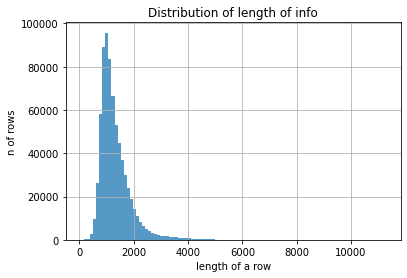

In [1075]:
from matplotlib import pyplot as plt
plt.hist(train_df.day_info.str.len(), bins=100, alpha=0.75)
plt.xlabel('length of a row')
plt.ylabel('n of rows')
plt.title('Distribution of length of info')
plt.grid(True)
plt.show()

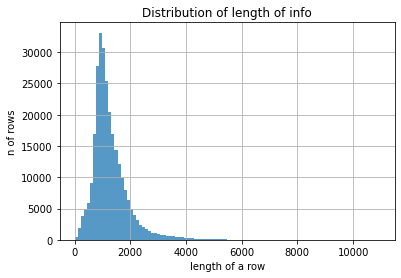

In [528]:
from matplotlib import pyplot as plt
plt.hist(train_df_finetuning.day_info.str.len(), bins=100, alpha=0.75)
plt.xlabel('length of a row')
plt.ylabel('n of rows')
plt.title('Distribution of length of info')
plt.grid(True)
plt.show()

In [1070]:
length_of_stay = train_df.sort_values(by=['hadm_id', 'day_id'], ascending=False).drop_duplicates(['hadm_id'])

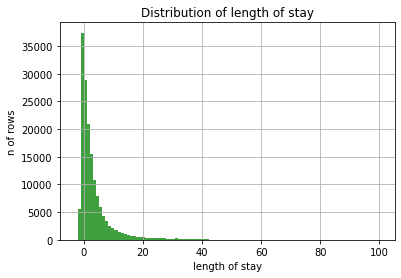

In [1076]:
from matplotlib import pyplot as plt
plt.hist(length_of_stay.day_id, bins=100, alpha=0.75, facecolor='g', range=(np.min(length_of_stay.day_id), 100))
plt.xlabel('length of stay')
plt.ylabel('n of rows')
plt.title('Distribution of length of stay')
plt.grid(True)
plt.show()

In [1081]:
print('n of admissions with length of stay up to 25 days', length_of_stay[length_of_stay.day_id <= 25].shape[0])
print('n of admissions with length of more than 25 days', length_of_stay[length_of_stay.day_id > 25].shape[0])


n of admissions with length of stay up to 25 days 155960
n of admissions with length of more than 25 days 2922


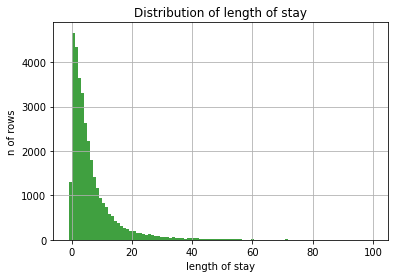

In [530]:
length_of_stay = train_df_finetuning.sort_values(by=['hadm_id', 'day_id'], ascending=False).drop_duplicates(['hadm_id'])

from matplotlib import pyplot as plt
plt.hist(length_of_stay.day_id, bins=100, alpha=0.75, facecolor='g', range=(np.min(length_of_stay.day_id), 100))
plt.xlabel('length of stay')
plt.ylabel('n of rows')
plt.title('Distribution of length of stay')
plt.grid(True)
plt.show()

## Make pid_df

In [373]:
# make pid_df 
def make_pid_df(SAVE_TO_PATH, df=train_df_finetuning, WITH_AKI_STATUS=True):
    pid_df = df.copy()
    adms = pid_df.hadm_id.unique().tolist()
    pid_list_of_dicts = []
    i = 0
    days = []

    for pid_adm in adms:
        toy = pid_df[pid_df.hadm_id == pid_adm].copy()
        pid_subject_id = toy.subject_id.values[0]

        days_in_visit = []
        demographics_in_visit = []
        previous_diags_icd = []
        previous_diags_titles = []
        lab_tests_in_visit = []
        medications_in_visit = []
        vitals_in_visit = []
        AKI_1_in_visit = []
        AKI_2_in_visit = []
        AKI_3_in_visit = []
        days = []

        for _, row in toy.iterrows():
            days_in_visit.append(row['day_info'])
            demographics_in_visit.append(row['demographics'])
            lab_tests_in_visit.append(row['lab_tests'])
            medications_in_visit.append(row['medications'])
            vitals_in_visit.append(row['vitals'])
            previous_diags_icd.append(row['previous_diags_icd'])
            previous_diags_titles.append(row['previous_diags_titles'])
            
            if WITH_AKI_STATUS:            
                if np.isnan(row['AKI_1']):
                    AKI_1_in_visit.append(row['AKI_1'])
                    AKI_2_in_visit.append(row['AKI_2'])
                    AKI_3_in_visit.append(row['AKI_3'])
                else:
                    AKI_1_in_visit.append(int(row['AKI_1']))
                    AKI_2_in_visit.append(int(row['AKI_2']))
                    AKI_3_in_visit.append(int(row['AKI_3']))
                    
                days.append(row['day_id'])

                pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':pid_adm, \
                            'demographics_in_visit':demographics_in_visit,\
                            'lab_tests_in_visit':lab_tests_in_visit,\
                            'medications_in_visit':medications_in_visit,
                            'vitals_in_visit':vitals_in_visit,\
                            'days_in_visit':days_in_visit, \
                            'AKI_1_in_visit':AKI_1_in_visit, \
                            'AKI_2_in_visit':AKI_2_in_visit, \
                            'AKI_3_in_visit':AKI_3_in_visit, \
                            'previous_diags_icd':previous_diags_icd, \
                            'previous_diags_titles':previous_diags_titles, \
                                'days':days})

            else:
                pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':pid_adm, \
                        'demographics_in_visit':demographics_in_visit,\
                        'lab_tests_in_visit':lab_tests_in_visit,\
                        'medications_in_visit':medications_in_visit,
                        'vitals_in_visit':vitals_in_visit,\
                        'days_in_visit':days_in_visit, \
                        'previous_diags_icd':previous_diags_icd, \
                        'previous_diags_titles':previous_diags_titles, \
                        'days':days})
                    
        i += 1
        # if i >5: break

        if i  % 1000 == 0:
            # with open(DF_PATH + 'pid_list_of_dicts.pkl', 'wb') as f:
            #     pickle.dump(pid_list_of_dicts, f, protocol=pickle.HIGHEST_PROTOCOL)
            print(f'{i} admissions finished')

    pid_df = pd.DataFrame(pid_list_of_dicts).drop_duplicates('hadm_id')

    with open(SAVE_TO_PATH, 'wb') as f:
        pickle.dump(pid_df, f, protocol=pickle.HIGHEST_PROTOCOL)
        
    print(f'{i} admissions saved into a dataframe to ----> {SAVE_TO_PATH}')


### Make pid_train_df_finetuning

In [366]:
train_df_finetuning.previous_diags_icd.unique().shape

(4100,)

In [369]:
print('train_df_finetuning ', train_df_finetuning.shape[0], len(train_df_finetuning.hadm_id.unique()))
print('val_df_finetuning ', val_df_finetuning.shape[0], len(val_df_finetuning.hadm_id.unique()))
print('test_df_finetuning ', test_df_finetuning.shape[0], len(test_df_finetuning.hadm_id.unique()))
train_df_finetuning.head(1)

train_df_finetuning  47785 7082
val_df_finetuning  5929 886
test_df_finetuning  6019 885


,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,previous_diags_icd,previous_diags_titles,AKI_1,AKI_2,AKI_3
143,16788749.0,20000808.0,-1.0,white f 54,NaN,fluticasone propionate nasal 1 spry ; sertra...,NaN,white f 54 $nan$nan$fluticasone propionate nas...,,,NaN,NaN,NaN


In [374]:
%%time
SAVE_TO_PATH = DF_PATH + 'pid_train_df_finetuning.pkl'
make_pid_df(SAVE_TO_PATH=SAVE_TO_PATH, df=train_df_finetuning)

1000 admissions finished
2000 admissions finished
3000 admissions finished
4000 admissions finished
5000 admissions finished
6000 admissions finished
7000 admissions finished
7082 admissions saved into a dataframe to ----> /home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/pid_train_df_finetuning.pkl
CPU times: user 8.34 s, sys: 281 ms, total: 8.62 s
Wall time: 8.75 s


In [375]:
%%time
SAVE_TO_PATH = DF_PATH + 'pid_test_df_finetuning.pkl'
make_pid_df(SAVE_TO_PATH=SAVE_TO_PATH, df=test_df_finetuning)

885 admissions saved into a dataframe to ----> /home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/pid_test_df_finetuning.pkl
CPU times: user 1.01 s, sys: 37.3 ms, total: 1.05 s
Wall time: 1.05 s


In [376]:
%%time
SAVE_TO_PATH = DF_PATH + 'pid_val_df_finetuning.pkl'
make_pid_df(SAVE_TO_PATH=SAVE_TO_PATH, df=val_df_finetuning)

886 admissions saved into a dataframe to ----> /home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/pid_val_df_finetuning.pkl
CPU times: user 1.01 s, sys: 39.6 ms, total: 1.05 s
Wall time: 1.05 s


In [377]:
with open(DF_PATH + 'pid_train_df_finetuning.pkl', 'rb') as f:
   pid_train_df_finetuning = pickle.load(f)

with open(DF_PATH + 'pid_test_df_finetuning.pkl', 'rb') as f:
   pid_test_df_finetuning = pickle.load(f)

with open(DF_PATH + 'pid_val_df_finetuning.pkl', 'rb') as f:
   pid_val_df_finetuning = pickle.load(f)

In [378]:
print(pid_test_df_finetuning.shape[0])
pid_test_df_finetuning.head(2)

885


,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,AKI_1_in_visit,AKI_2_in_visit,AKI_3_in_visit,previous_diags_icd,previous_diags_titles,days
0,10467237.0,20000019.0,"[hispanic latino f 76 , hispanic latino f 76 ,...",[hematology blood hematocrit 26.5 %; hematol...,[pneumococcal 23-valent polysaccharide vaccine...,[temp 98.0 heartrate 65.0 resprate 16.0 ...,[hispanic latino f 76 $temp 98.0 heartrate ...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]","[ , , ]","[ , , ]","[0.0, 1.0, 2.0]"
3,16615356.0,20009896.0,"[white m 44 , white m 44 , white m 44 , white ...",[hematology blood hematocrit 31.5 %; hematol...,[0.9% sodium chloride 1000 ml ; diazepam 10...,"[nan, nan, nan, nan]",[white m 44 $nan$hematology blood hematocrit ...,"[0, 0, 0, nan]","[0, 0, 0, nan]","[0, 0, 0, nan]",[d9598 d29181 d30300 de9289 de8889 de8499 d959...,"[other specified sites, including multiple inj...","[0.0, 1.0, 2.0, 3.0]"


In [476]:
# clean from admissions with a lot of nan in aki status

cleaned_adms = []
for _, row in pid_train_df_finetuning.iterrows():
    if (len(row.aki_status_in_visit) > 3 ) & (np.isnan(row.aki_status_in_visit[:7]).astype(int).sum() < 3) & ~(np.isnan(row.aki_status_in_visit).all()):
        cleaned_adms.append(row.hadm_id)
pid_train_df_finetuning = pid_train_df_finetuning[pid_train_df_finetuning.hadm_id.isin(cleaned_adms)]

cleaned_adms = []
for _, row in pid_test_df_finetuning.iterrows():
    if (len(row.aki_status_in_visit) > 3 ) & (np.isnan(row.aki_status_in_visit[:7]).astype(int).sum() < 3) & ~(np.isnan(row.aki_status_in_visit).all()):
        cleaned_adms.append(row.hadm_id)
pid_test_df_finetuning = pid_test_df_finetuning[pid_test_df_finetuning.hadm_id.isin(cleaned_adms)]

cleaned_adms = []
for _, row in pid_val_df_finetuning.iterrows():
    if (len(row.aki_status_in_visit) > 3 ) & (np.isnan(row.aki_status_in_visit[:7]).astype(int).sum() < 3) & ~(np.isnan(row.aki_status_in_visit).all()):
        cleaned_adms.append(row.hadm_id)
pid_val_df_finetuning = pid_val_df_finetuning[pid_val_df_finetuning.hadm_id.isin(cleaned_adms)]

In [477]:
print(pid_train_df_finetuning.shape[0])
print(pid_test_df_finetuning.shape[0])
print(pid_val_df_finetuning.shape[0])

20062
1755
1747


In [142]:
ft_admissions = pid_train_df_finetuning.hadm_id.tolist() \
                    + pid_test_df_finetuning.hadm_id.tolist() \
                    + pid_val_df_finetuning.hadm_id.tolist()

len(ft_admissions)

8853

In [145]:
with open(DF_PATH+'pid_train_df_finetuning.pkl', 'wb') as f:
    pickle.dump(pid_train_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH + 'pid_test_df_finetuningaki.pkl', 'wb') as f:
    pickle.dump(pid_test_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)

with open(DF_PATH+'pid_val_df_finetuning', 'wb') as f:
    pickle.dump(pid_val_df_finetuning, f, protocol=pickle.HIGHEST_PROTOCOL)   

In [146]:
data_demographics[data_demographics.hadm_id==20007876]

,subject_id,hadm_id,admittime,dischtime,ethnicity,gender,age,demographics
446918,13511375,20007876.0,2186-12-26,2186-12-28 16:15:00,WHITE,F,70.0,WHITE F 70.0


In [144]:
pid_train_df_finetuning

,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,AKI_1_in_visit,AKI_2_in_visit,AKI_3_in_visit,previous_diagnoses,days
0,10467237,20000019,"[hispanic latino f 76, hispanic latino f 76, h...",[hematology blood hematocrit 26.5 %; hematol...,[pneumococcal 23-valent polysaccharide vaccine...,[temp 98.0 heartrate 65.0 resprate 16.0 ...,[hispanic latino f 76$temp 98.0 heartrate 6...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",[ ...,"[0, 1, 2]"
3,16788749,20000808,"[white f 54, white f 54, white f 54, white f 5...","[nan, hematology blood hematocrit 37.9 %; he...",[fluticasone propionate nasal 1 spry ; sertr...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[white f 54$nan$nan$fluticasone propionate nas...,"[nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, nan, ...","[nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, nan, ...","[nan, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, nan, nan, ...",[ ...,"[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]"
17,13167836,20005426,"[white f 86, white f 86, white f 86, white f 8...","[nan, hematology blood hematocrit 23.6 %; he...","[levothyroxine sodium 50 mcg ; , levothyroxi...","[nan, nan, nan, nan, nan, nan]",[white f 86$nan$nan$levothyroxine sodium 50 ...,"[nan, 0, nan, nan, nan, nan]","[nan, 0, nan, nan, nan, nan]","[nan, 0, nan, nan, nan, nan]",[ 42731 4580 2449 4019 5849 82022 v433 ...,"[-1, 0, 1, 2, 3, 4]"
23,13511375,20007876,"[white f 7, white f 7, white f 7]","[nan, hematology blood hematocrit 30.1 %; he...",[sodium chloride 0.9% flush 3-10 ml ; lacta...,"[nan, nan, nan]",[white f 7$nan$nan$sodium chloride 0.9% flush...,"[nan, 0, 0]","[nan, 0, 0]","[nan, 0, 0]",[ ...,"[0, 1, 2]"
26,11167124,20007997,"[white f 35, white f 35, white f 35, white f 3...",[hematology blood hematocrit 39.1 %; hematol...,"[nan, nan, naloxone 40-80 mcg ; naloxone 0....","[nan, nan, nan, nan, nan, nan, nan, nan]",[white f 35$nan$hematology blood hematocrit 3...,"[0, 0, 1, 0, 0, nan, nan, nan]","[0, 0, 1, 0, 0, nan, nan, nan]","[0, 0, 0, 0, 0, nan, nan, nan]",[ ...,"[0, 1, 2, 3, 4, 5, 6, 7]"
...,...,...,...,...,...,...,...,...,...,...,...,...
47595,18305238,29994751,"[white f 59, white f 59, white f 59, white f 5...","[nan, hematology blood hematocrit 32.3 %; he...",[docusate sodium 200 mg ; omeprazole 20 mg...,"[nan, nan, nan, nan, nan, nan]",[white f 59$nan$nan$docusate sodium 200 mg ;...,"[nan, 0, 0, 0, 1, 1]","[nan, 0, 0, 0, 1, 1]","[nan, 0, 0, 0, 0, 0]",[ ...,"[-1, 0, 1, 2, 3, 4]"
47601,11941556,29994910,"[white f 91, white f 91, white f 91]",[hematology blood hematocrit 37.9 %; hematol...,[0.45% sodium chloride 1000 ml ; sodium chlo...,[temp 98.3 heartrate 64.0 resprate 18.0 ...,[white f 91$temp 98.3 heartrate 64.0 respr...,"[0, 0, 0]","[0, 0, 0]","[0, 0, 0]",[ ...,"[0, 1, 2]"
47604,11234535,29998698,"[white m 63, white m 63, white m 63, white m 6...",[hematology blood hematocrit 37.8 %; hematol...,[influenza virus vaccine 0.5 ml ; sodium chl...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[white m 63$nan$hematology blood hematocrit 3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, nan]","[0, 0, 0, 0, 0, 0, 0, 0, 0, nan]","[0, 0, 0, 0, 0, 0, 0, 0, 0, nan]",[ 28731 25000 5715 32723 v1301 v1582 v49...,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
47614,16968104,29998702,"[white m 59, white m 59, white m 59, white m 5...",[hematology blood hematocrit 24.9 %; hematol...,[influenza vaccine quadrivalent 0.5 ml ; sod...,[temp 97.4 heartrate 62.0 resprate 14.0 ...,[white m 59$temp 97.4 heartrate 62.0 respr...,"[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]",[ ...,"[0, 1, 2, 3, 4]"


### Make pid_train_df_pretraining

In [27]:
print(train_df_pre.shape[0])
print(val_df_pre.shape[0])

SAVE_TO_PATH = DF_PATH + 'pid_val_df_pretraining.pkl'
# pid_df = train_df_pre
pid_df = val_df_pre

2372741
18602


In [22]:
pid_df.head(2)

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,previous_diags_icd,previous_diags_titles,day_info
3,16925328.0,20000024.0,0.0,white f 92,hematology blood hematocrit 32.1 %; hematolo...,oxycodone (immediate release) 2.5 mg ; gabap...,temp 98.2 heartrate 53.0 resprate 18.0 o...,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",white f 92 $temp 98.2 heartrate 53.0 respr...
4,16925328.0,20000024.0,1.0,white f 92,NaN,sodium chloride 0.9% flush 3 ml ; heparin ...,NaN,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",white f 92 $nan$nan$sodium chloride 0.9% flus...


In [30]:
# make pid_df 
def make_pid_df(admission, pid_df=pid_df, SAVE_TO_PATH=SAVE_TO_PATH, WITH_AKI_STATUS=False):
    try:
        pid_list_of_dicts = []
        i = 0
        days = []
        toy = pid_df[pid_df.hadm_id == admission].copy()
        pid_subject_id = toy.subject_id.values[0]

        days_in_visit = []
        demographics_in_visit = []
        previous_diags_icd = []
        previous_diags_titles = []
        lab_tests_in_visit = []
        medications_in_visit = []
        vitals_in_visit = []
        aki_status_in_visit = []
        days = []
        
        

        for _, row in toy.iterrows():
            days_in_visit.append(row['day_info'])
            demographics_in_visit.append(row['demographics'])
            previous_diags_icd.append(row['previous_diags_icd'])
            previous_diags_titles.append(row['previous_diags_titles'])
            lab_tests_in_visit.append(row['lab_tests'])
            medications_in_visit.append(row['medications'])
            vitals_in_visit.append(row['vitals'])
            days.append(row['day_id'])
            
        if WITH_AKI_STATUS:            
            if np.isnan(row['aki_status']):
                aki_status_in_visit.append(row['aki_status'])
            else:
                aki_status_in_visit.append(int(row['aki_status']))
            

            pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':admission, \
                        'demographics_in_visit':demographics_in_visit,\
                        'lab_tests_in_visit':lab_tests_in_visit,\
                        'medications_in_visit':medications_in_visit,
                        'vitals_in_visit':vitals_in_visit,\
                        'days_in_visit':days_in_visit, \
                        'aki_status_in_visit':aki_status_in_visit, \
                        'previous_diags_titles':previous_diags_titles, \
                        'previous_diags_icd':previous_diags_icd, \
                        'days':days})

        else:
            pid_list_of_dicts.append({'subject_id':pid_subject_id, 'hadm_id':admission, \
                    'demographics_in_visit':demographics_in_visit,\
                    'lab_tests_in_visit':lab_tests_in_visit,\
                    'medications_in_visit':medications_in_visit,
                    'vitals_in_visit':vitals_in_visit,\
                    'days_in_visit':days_in_visit, \
                    'previous_diags_icd':previous_diags_icd, \
                    'previous_diags_titles':previous_diags_titles, \
                    'days':days})
                        
            # i += 1
            # if i >5: break

            # if i  % 1000 == 0:
            #     # with open(DF_PATH + 'pid_list_of_dicts.pkl', 'wb') as f:
            #     #     pickle.dump(pid_list_of_dicts, f, protocol=pickle.HIGHEST_PROTOCOL)
            #     print(f'{i} admissions finished')

        # pid_test_df = pd.DataFrame(pid_list_of_dicts)

        # with open(SAVE_TO_PATH, 'wb') as f:
        #     pickle.dump(pid_test_df, f, protocol=pickle.HIGHEST_PROTOCOL)
            
        # print(f'{i} admissions saved into a dataframe to ----> {SAVE_TO_PATH}')
    except:
        print(admission)

    return pid_list_of_dicts

In [38]:
DF_PATH = '/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/'
with open(DF_PATH + 'pid_train_df_pretraining.pkl', 'rb') as f:
    pid_train_df_pretraining = pickle.load(f)
pid_train_df_pretraining.head()

,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,previous_diags_icd,previous_diags_titles,days
0,16925328.0,20000024.0,"[white f 92 , white f 92 ]",[hematology blood hematocrit 32.1 %; hematol...,[oxycodone (immediate release) 2.5 mg ; gaba...,[temp 98.2 heartrate 53.0 resprate 18.0 ...,[white f 92 $temp 98.2 heartrate 53.0 resp...,[ds32059a dy92000 dm1990 ds3210xa di10 dw010xx...,[unspecified fracture of fifth lumbar vertebra...,"[0.0, 1.0]"
2,19430048.0,20000034.0,"[black african american m 74 , black african a...",[hematology blood hematocrit 30.3 %; hematol...,[influenza vaccine quadrivalent 0.5 ml ; sod...,"[nan, nan, nan]",[black african american m 74 $nan$hematology b...,[dz8719 dn184 de83119 dk861 dz8619 dj439 dr338...,[personal history of other diseases of the dig...,"[0.0, 1.0, 2.0]"
5,18910522.0,20000041.0,"[white f 63 , white f 63 , white f 63 , white ...",[hematology blood hematocrit 28.2 %; hematol...,[aspirin 81 mg ; bisacodyl 10 mg ; ezetimi...,"[nan, nan, nan, nan]",[white f 63 $nan$hematology blood hematocrit ...,[dv1271 d27801 d71536 dv8801 d2859 dv1301 dv12...,[personal history of peptic ulcer disease morb...,"[0.0, 1.0, 2.0, 3.0]"
9,11146739.0,20000057.0,"[white f 93 , white f 93 , white f 93 , white ...","[nan, hematology blood hematocrit 38.4 %; he...",[timolol maleate 0.5% 1 drop ; levothyroxine...,[temp 99.3 heartrate 81.0 resprate 16.0 ...,[white f 93 $temp 99.3 heartrate 81.0 resp...,"[d9597 de8490 de8889 de8889, d9597 de8490 de88...","[knee, leg, ankle, and foot injury home accide...","[-1.0, 0.0, 1.0, 2.0, 3.0]"
14,14546051.0,20000069.0,"[hispanic latino f 32 , hispanic latino f 32 ,...","[nan, nan, nan]",[sodium chloride 0.9% flush 3 ml ; lactated...,"[nan, nan, nan]",[hispanic latino f 32 $nan$nan$sodium chloride...,"[ , , ]","[ , , ]","[0.0, 1.0, 2.0]"


In [27]:
train_df_pre.head(3)

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,previous_diags_icd,previous_diags_titles,day_info
3,16925328.0,20000024.0,0.0,white f 92,hematology blood hematocrit 32.1 %; hematolo...,oxycodone (immediate release) 2.5 mg ; gabap...,temp 98.2 heartrate 53.0 resprate 18.0 o...,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",white f 92 $temp 98.2 heartrate 53.0 respr...
4,16925328.0,20000024.0,1.0,white f 92,NaN,sodium chloride 0.9% flush 3 ml ; heparin ...,NaN,ds32059a dy92000 dm1990 ds3210xa di10 dw010xxa...,"unspecified fracture of fifth lumbar vertebra,...",white f 92 $nan$nan$sodium chloride 0.9% flus...
5,19430048.0,20000034.0,0.0,black african american m 74,hematology blood hematocrit 30.3 %; hematolo...,influenza vaccine quadrivalent 0.5 ml ; sodi...,NaN,dz8719 dn184 de83119 dk861 dz8619 dj439 dr338 ...,personal history of other diseases of the dige...,black african american m 74 $nan$hematology bl...


In [31]:
e = make_pid_df(20299050.0)
e = pd.DataFrame(e)
e

,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,previous_diags_icd,previous_diags_titles,days
0,17643200.0,20299050.0,"[white f 91 , white f 91 , white f 91 , white ...","[nan, hematology blood hematocrit 33.7 %; he...",[aspirin 325 mg ; isosorbide mononitrate (ex...,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ...",[white f 91 $nan$nan$aspirin 325 mg ; isosor...,"[ , , , , , , , , , , , , ]","[ , , , , , , , , , , , , ]","[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,..."


In [32]:
%%time
import traceback
import multiprocessing

SAVE_TO_PATH = DF_PATH + 'pid_val_df_pretraining.pkl'
# SAVE_TO_PATH = DF_PATH + 'mock.pkl'

pid_hamds = val_df_pre.hadm_id.unique().tolist()

print(f'Total {len(pid_hamds)} admissions')

final_df = pd.DataFrame()
chunk_size = 5000
# chunk_size = 50
n_chunks = len(pid_hamds)//chunk_size
# n_chunks = 1


for i in range(0,n_chunks+1):
    with multiprocessing.Pool(processes=86) as pool_obj:
        df = pool_obj.map(make_pid_df, pid_hamds[i*chunk_size:(i+1)*chunk_size])
        
    for e in df[:]:
        temp = pd.DataFrame(e)
        final_df = pd.concat([final_df, temp], ignore_index=True)

    print("Finished {} admissions. Saving..".format((i+1)*chunk_size))

    with open(SAVE_TO_PATH, 'wb') as f:
        pickle.dump(final_df, f, protocol=pickle.HIGHEST_PROTOCOL)
    print('Saved!')

Total 3148 admissions
Finished 5000 admissions. Saving..
Saved!
CPU times: user 3.67 s, sys: 17.5 s, total: 21.2 s
Wall time: 24.9 s


In [33]:
final_df = final_df.drop_duplicates(subset=['hadm_id', 'subject_id'])

In [35]:
print(final_df.shape)
final_df.head()

(3148, 10)


,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,previous_diags_icd,previous_diags_titles,days
0,18346781.0,20002270.0,"[white m 46 , white m 46 , white m 46 , white ...","[nan, hematology blood hematocrit 35.3 %; he...","[nicotine patch 7 mg ; , nicotine patch 7 ...","[nan, nan, nan, nan, nan]","[white m 46 $nan$nan$nicotine patch 7 mg ; ,...","[ , , , , ]","[ , , , , ]","[-1.0, 0.0, 1.0, 2.0, 3.0]"
1,18200692.0,20003318.0,"[black african american m 63 , black african a...",[hematology blood hematocrit 43.4 %; hematol...,"[nan, sodium chloride 0.9% flush 3 ml ; ace...","[nan, nan, nan]",[black african american m 63 $nan$hematology b...,"[ , , ]","[ , , ]","[-1.0, 0.0, 1.0]"
2,17657179.0,20006771.0,"[white m 42 , white m 42 , white m 42 , white ...",[hematology blood hematocrit 38.7 %; hematol...,[omeprazole 20 mg ; docusate sodium 100 mg...,"[nan, nan, nan, nan, nan, nan, nan, nan]",[white m 42 $nan$hematology blood hematocrit ...,"[ , , , , , , , ]","[ , , , , , , , ]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]"
3,13682185.0,20013340.0,"[hispanic latino f 23 , hispanic latino f 23 ,...",[hematology blood hematocrit 33.1 %; hematol...,[naloxone 40-80 mcg ; metoclopramide 10 mg...,"[nan, nan, nan, nan, nan]",[hispanic latino f 23 $nan$hematology blood he...,"[ , , , , ]","[ , , , , ]","[0.0, 1.0, 2.0, 3.0, 4.0]"
4,17396346.0,20014583.0,"[black african american f 72 , black african a...","[nan, hematology blood hematocrit 31.1 %; he...",[aspirin 81 mg ; atorvastatin 80 mg ; losa...,[temp heartrate 69.0 resprate 22.0 o2sa...,[black african american f 72 $temp heartrat...,[d27800 d27803 dv140 d2724 dv148 dv140 d73390 ...,"[obesity, unspecified obesity hypoventilation ...","[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]"


In [39]:
SAVE_TO_PATH

'/home/svetlanamaslenkova/Documents/AKI_deep/LSTM/dataframes/pid_val_df_pretraining.pkl'

In [41]:
with open(SAVE_TO_PATH, 'wb') as f:
    pickle.dump(final_df, f, protocol=pickle.HIGHEST_PROTOCOL)

In [42]:
with open(DF_PATH + 'pid_val_df_pretraining.pkl', 'rb') as f:
    pid_val_df_pretraining = pickle.load(f)

In [43]:
pid_val_df_pretraining

,subject_id,hadm_id,demographics_in_visit,lab_tests_in_visit,medications_in_visit,vitals_in_visit,days_in_visit,previous_diags_icd,previous_diags_titles,days
0,18346781.0,20002270.0,"[white m 46 , white m 46 , white m 46 , white ...","[nan, hematology blood hematocrit 35.3 %; he...","[nicotine patch 7 mg ; , nicotine patch 7 ...","[nan, nan, nan, nan, nan]","[white m 46 $nan$nan$nicotine patch 7 mg ; ,...","[ , , , , ]","[ , , , , ]","[-1.0, 0.0, 1.0, 2.0, 3.0]"
1,18200692.0,20003318.0,"[black african american m 63 , black african a...",[hematology blood hematocrit 43.4 %; hematol...,"[nan, sodium chloride 0.9% flush 3 ml ; ace...","[nan, nan, nan]",[black african american m 63 $nan$hematology b...,"[ , , ]","[ , , ]","[-1.0, 0.0, 1.0]"
2,17657179.0,20006771.0,"[white m 42 , white m 42 , white m 42 , white ...",[hematology blood hematocrit 38.7 %; hematol...,[omeprazole 20 mg ; docusate sodium 100 mg...,"[nan, nan, nan, nan, nan, nan, nan, nan]",[white m 42 $nan$hematology blood hematocrit ...,"[ , , , , , , , ]","[ , , , , , , , ]","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]"
3,13682185.0,20013340.0,"[hispanic latino f 23 , hispanic latino f 23 ,...",[hematology blood hematocrit 33.1 %; hematol...,[naloxone 40-80 mcg ; metoclopramide 10 mg...,"[nan, nan, nan, nan, nan]",[hispanic latino f 23 $nan$hematology blood he...,"[ , , , , ]","[ , , , , ]","[0.0, 1.0, 2.0, 3.0, 4.0]"
4,17396346.0,20014583.0,"[black african american f 72 , black african a...","[nan, hematology blood hematocrit 31.1 %; he...",[aspirin 81 mg ; atorvastatin 80 mg ; losa...,[temp heartrate 69.0 resprate 22.0 o2sa...,[black african american f 72 $temp heartrat...,[d27800 d27803 dv140 d2724 dv148 dv140 d73390 ...,"[obesity, unspecified obesity hypoventilation ...","[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]"
...,...,...,...,...,...,...,...,...,...,...
3143,15444391.0,29986576.0,"[white m 73 , white m 73 , white m 73 , white ...","[nan, hematology blood hematocrit 34.7 %; he...","[omeprazole 20 mg ; , omeprazole 20 mg ; h...","[nan, nan, nan, nan, nan]","[white m 73 $nan$nan$omeprazole 20 mg ; , wh...",[d5761 d1551 d53085 d7907 d99659 d53081 d53081...,[cholangitis malignant neoplasm of intrahepati...,"[-1.0, 0.0, 1.0, 2.0, 3.0]"
3144,10623647.0,29991969.0,"[white m 20 , white m 20 , white m 20 ]",[hematology blood hematocrit 40.1 %; hematol...,[influenza vaccine quadrivalent 0.5 ml ; sod...,[temp heartrate 100.0 resprate 33.0 o2s...,[white m 20 $temp heartrate 100.0 resprat...,"[dz720 dk3580 dj189 , dz720 dk3580 dj189 , dz7...",[tobacco use unspecified acute appendicitis pn...,"[0.0, 1.0, 2.0]"
3145,12716528.0,29994137.0,"[white m 52 , white m 52 , white m 52 , white ...","[nan, hematology blood hematocrit 30.8 %; he...","[insulin 10 unit ; , insulin 10 unit ; sod...","[nan, nan, nan, nan, nan, nan, nan, nan, nan]","[white m 52 $nan$nan$insulin 10 unit ; , whi...",[d27651 dv5867 d99674 d78959 d2720 d5538 d4530...,[dehydration long-term (current) use of insuli...,"[-1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0]"
3146,13823558.0,29995272.0,[white f 19 ],[hematology blood hematocrit 39.3 %; hematol...,[nan],[temp 101.4 heartrate 103.0 resprate 16.0...,[white f 19 $temp 101.4 heartrate 103.0 re...,[ ],[ ],[-1.0]


In [37]:
print(val_df_pre.hadm_id.unique().shape[0])
print(train_df_pre.hadm_id.unique().shape[0])

3148
390337


In [878]:
train_df_pre.hadm_id.unique()

array([20000019, 20000024, 20000034, ..., 29999745, 29999828, 29999928])

In [879]:
train_df_pre[train_df_pre.hadm_id==20000019]

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals
0,10467237,20000019,0,HISPANIC/LATINO F 76.0,Hematology Blood hematocrit {26.5} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,temp {98.0} heartrate {65.0} resprate {16.0} o...
1,10467237,20000019,1,HISPANIC/LATINO F 76.0,Hematology Blood hematocrit {28.1} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN
2,10467237,20000019,2,HISPANIC/LATINO F 76.0,Hematology Blood hematocrit {23.9} %; Hematolo...,PNEUMOcoccal 23-valent polysaccharide vaccine ...,NaN


In [ ]:
make_pid_df(20000019)

In [872]:
val_df_pre.hadm_id.unique()

array([20013743, 20014934, 20016550, ..., 29991391, 29994893, 29996682])

In [871]:
final_df.shape

(0, 0)

## Other

In [ ]:
# with open(DF_PATH + 'train_df.pkl', 'rb') as f:
#     train_df = pickle.load(f)

# with open(DF_PATH + 'pid_list_of_dicts.pkl', 'rb') as f:
#     pid_df = pickle.load(f)

# pid_df = pd.DataFrame(pid_df)

# days = []
# i = 0
# for adm in pid_df.hadm_id.unique():
#     days.append(train_df[train_df.hadm_id==adm].day_id.values)
#     #i += 1
#     #if i >5:break

# pid_df['days'] = days

In [23]:
with open(DF_PATH + 'train_df.pkl', 'rb') as f:
   train_df = pickle.load(f)

In [32]:
# check how many patients had aki < 10 days

S = train_df[train_df.aki_status==1.0].sort_values('day_id').drop_duplicates(subset='hadm_id')
S[S.day_id < 10]

,subject_id,hadm_id,day_id,demographics,lab_tests,medications,vitals,day_info,aki_status
458008,17443681,24690642,-2,WHITE F 78.0,Hematology Blood hematocrit {27.3} %; Hematolo...,NaN,temp {97.2} heartrate {106.0} resprate {18.0} ...,WHITE F 78.0 temp {97.2} heartrate {106.0} res...,1.0
768433,15177955,27882895,-2,WHITE F 89.0,Hematology Blood hematocrit {42.3} %; Hematolo...,NaN,temp {98.4} heartrate {76.0} resprate {14.0} o...,WHITE F 89.0 temp {98.4} heartrate {76.0} resp...,1.0
189104,11605177,26431375,-2,WHITE F 84.0,Hematology Blood hematocrit {16.0} %; Hematolo...,NaN,temp {97.3} heartrate {81.0} resprate {20.0} o...,WHITE F 84.0 temp {97.3} heartrate {81.0} resp...,1.0
868152,16386312,28904280,-2,WHITE M 80.0,Hematology Blood hematocrit {31.9} %; Hematolo...,NaN,temp {97.6} heartrate {58.0} resprate {17.0} o...,WHITE M 80.0 temp {97.6} heartrate {58.0} resp...,1.0
161942,17894333,22030479,-2,WHITE M 60.0,Hematology Blood hematocrit {39.3} %; Hematolo...,NaN,NaN,WHITE M 60.0 nan Hematology Blood hematocrit {...,1.0
...,...,...,...,...,...,...,...,...,...
195255,15709543,26509318,9,WHITE M 31.0,Hematology Blood hematocrit {25.3} %; Hematolo...,Sodium Chloride 0.9% Flush {3} mL ; Gabapenti...,NaN,WHITE M 31.0 nan Hematology Blood hematocrit {...,1.0
868001,14623995,28902597,9,OTHER M 63.0,Hematology Blood hematocrit {32.5} %; Hematolo...,Nicotine Patch {14} mg ; Sodium Chloride 0.9% ...,NaN,OTHER M 63.0 nan Hematology Blood hematocrit {...,1.0
320615,10174787,23289988,9,WHITE M 77.0,Hematology Blood hematocrit {32.0} %; Hematolo...,Heparin {5000} UNIT ; Bisacodyl {10} mg ; Insu...,NaN,WHITE M 77.0 nan Hematology Blood hematocrit {...,1.0
838306,19447329,28593598,9,WHITE F 92.0,Hematology Blood hematocrit {26.8} %; Hematolo...,OxyCODONE (Immediate Release) {2.5-5} mg ; Ace...,NaN,WHITE F 92.0 nan Hematology Blood hematocrit {...,1.0


In [219]:
final_aki_status[final_aki_status.hadm_id==29999396]

,hadm_id,day_id,AKI_1,AKI_2,AKI_3
682057,29999396,0.0,0,0,0
682058,29999396,1.0,0,0,0


In [223]:
dataset[dataset.hadm_id==29999396]

,subject_id,hadm_id,admittime,AKI_1,AKI_2,AKI_3,ethnicity,gender,age,max_creatinine,...,max_resprate,max_o2sat,max_sbp,max_dbp,min_temperature,min_heartrate,min_resprate,min_o2sat,min_sbp,min_dbp
3629,19794259,29999396,2181-10-01 16:57:00,0,0,0,8,2,87,1.2,...,18.0,97.0,130.0,73.0,97.4,64.0,18.0,97.0,108.0,68.0


In [23]:
S = final_aki_status[final_aki_status.AKI_3==1].sort_values('day_id').drop_duplicates('hadm_id')


,hadm_id,day_id,AKI_1,AKI_2,AKI_3
1010103,25086381,2.0,1,1,1
1001607,25514083,2.0,1,1,1
1046417,29403826,2.0,1,1,1
1039360,27376739,2.0,1,1,1
1009059,28335206,2.0,1,1,1
...,...,...,...,...,...
990090,21050259,3.0,1,1,1
990532,20875369,3.0,1,1,1
65506,21941559,3.0,1,1,1
452865,25577198,3.0,1,1,1


In [24]:
final_aki_status[final_aki_status.hadm_id==25086381]

,hadm_id,day_id,AKI_1,AKI_2,AKI_3
1010101,25086381,0.0,1,0,0
1010102,25086381,1.0,1,0,0
1010103,25086381,2.0,1,1,1
1010104,25086381,3.0,1,1,0
